# 1 - Configurando ambiente

Olá! Para utilização correta desse notebook, devemos seguir alguns passos para configuração do ambiente e outros parâmetros. Lembrando, caso queira utilizar esse notebook sem modificar o caminho dos arquivos, crie uma pasta no seu Drive exatamente como a que está aqui (Colab) e salve os arquivos lá!

Os arquivos utilizados são de cursos que fiz ao longo do tempo, segue link para descarregar arquivos:

https://drive.google.com/drive/folders/1-RiB0X7Kzpyik9Vt9ws7TSl1yGjFiLzh?usp=sharing

Montando GOOGLE DRIVE para usar arquivos hospedados:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Instalando as dependências e configurando o ambiente:

In [ ]:
# Baixando a versão mais recente do java8;
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download via stp do Spark:
!wget -q https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop2.tgz

# Extraindo o arquivo tgz:
!tar xf /content/spark-3.3.2-bin-hadoop2.tgz

# Instalando o findspark que é responsável para que as variáveis ​​do ambiente sejam definidas corretamente e o pyspark seja importado:
!pip install -q findspark

In [ ]:
import os
# Definindo váriaves de ambiente:
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
os.environ['SPARK_HOME'] = '/content/spark-3.3.2-bin-hadoop2'

# utilizando o findspark para que o pyspark seja 'importável':
import findspark
findspark.init('spark-3.3.2-bin-hadoop2')

# Importação SparkSession + Functions:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

**IMPORTANTE!!**

Mais adiante nesse notebook vamos acessar arquivos em um banco de dados SQLITE e POSTGRESQL, para isso é necessário criar uma sessão com os drivers JDBC e isso já será feito no início. Porém, antes de seguir com a execução do código é necessário carregar os arquivos .jars na pasta jars do Spark para que funcione corretamente, nesse caso o caminho é:

/content/spark-3.3.2-bin-hadoop2/jars

Tutorial de como carregar vários jars em uma sessão do Spark:

https://sparkbyexamples.com/pyspark/how-to-add-multiple-jars-to-pyspark/?expand_article=1

In [ ]:
# Construção da variável do SparkSession com driver JDBC SQLITE + POSTGRESQL:
spark = SparkSession.builder\
          .config('spark.jars',
                  '/content/spark-3.3.2-bin-hadoop2/jars/sqlite-jdbc-3.34.0.jar,/content/spark-3.3.2-bin-hadoop2/jars/postgresql-42.6.0.jar')\
          .appName('colab_session')\
          .getOrCreate()

In [ ]:
# Abaixo deixo o código para criar sessão sem especificar nenhum drive!
'''spark = SparkSession.builder\
      .appName('colab_session')\
      .master('local[*]') \
      .getOrCreate()'''

"spark = SparkSession.builder      .appName('colab_session')      .master('local[*]')       .getOrCreate()"

In [ ]:
# Verificando se os drivers foram carregados:
print(spark.sparkContext.getConf().get('spark.jars'))

/content/spark-3.3.2-bin-hadoop2/jars/sqlite-jdbc-3.34.0.jar,/content/spark-3.3.2-bin-hadoop2/jars/postgresql-42.6.0.jar


In [ ]:
spark

In [ ]:
# Dica importante : Sempre usar o help para ter ajuda com algum método!
# Aqui podemos ver que o .builder.getOrCreate cria uma nova sessão caso não exista uma.
help(SparkSession.builder.getOrCreate)

Help on method getOrCreate in module pyspark.sql.session:

getOrCreate() -> 'SparkSession' method of pyspark.sql.session.Builder instance
    Gets an existing :class:`SparkSession` or, if there is no existing one, creates a
    new one based on the options set in this builder.
    
    .. versionadded:: 2.0.0
    
    Examples
    --------
    This method first checks whether there is a valid global default SparkSession, and if
    yes, return that one. If no valid global default SparkSession exists, the method
    creates a new SparkSession and assigns the newly created SparkSession as the global
    default.
    
    >>> s1 = SparkSession.builder.config("k1", "v1").getOrCreate()
    >>> s1.conf.get("k1") == "v1"
    True
    
    In case an existing SparkSession is returned, the config options specified
    in this builder will be applied to the existing SparkSession.
    
    >>> s2 = SparkSession.builder.config("k2", "v2").getOrCreate()
    >>> s1.conf.get("k1") == s2.conf.get("k1"

In [ ]:
# O DIR também é muito interessante utilizar, ele lista todos os atributos válidos dentro da variável:
dir(spark.builder)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_lock',
 '_options',
 '_sc',
 'appName',
 'config',
 'enableHiveSupport',
 'getOrCreate',
 'master']

# 2 - Lendo arquivos

**Arquivos CSV:**

Há alguns parâmetros importantes na hora de fazer a leitura dos arquivos csv utilizando o método .csv() do atributo read do SparkSession.


`path`:
É o diretório que o arquivo encotra-se armazenado;

`sep`:
É o separador que se utiliza para que as colunas sejam separadas dentro do arquivo de dados;

`header`:
É o boleano que utiliza a primeira linha para a nomeação das colunas do arquivo;

`header`:
Considerar a primeira linha como nome de coluna ou não;

Todos parâmetros do spark.read.csv: https://spark.apache.org/docs/latest/sql-data-sources-csv.html


In [ ]:
# A váriavel vai retornar o resultado de uma classe de dataframe no caso, CSV.
df = spark.read.csv(path = '/content/drive/MyDrive/Colab/clientes.csv',
                    sep = ';',
                    header = True,
                    encoding = 'latin1')

In [ ]:
# Objeto dataframe atribuido a variavel df, visualizado com type:
print(type(df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
# Método de AÇÃO que retorna no terminal o resultado do DataFrame:
df.show(truncate = False)

+----------+---------------------+-------+--------+--------------------------------+------------+------+---------+--------+---------------+
|cliente_id|nm_cliente           |nr_cpf |dt_nasci|complemento                     |nr_telefone |cep   |salario  |desconto|banco_pgto     |
+----------+---------------------+-------+--------+--------------------------------+------------+------+---------+--------+---------------+
|1820      |Vitor Hugo da Luz    |108908 |30031986|             179,casa 1         |00-0910-2646|400487|3.580.121|21      |033 - Santander|
|2275      |Ian Moreira          |163362 |20031983|             97,casa 1          |00-1365-3969|400487|1.116.351|208     |033 - Santander|
|2730      |Nicole Silva         |217816 |26041989|             194,casa 3         |00-1820-5292|400487|8954.32  |219     |033 - Santander|
|3185      |Enrico Araújo        |272270 |18111982|             304,casa 1         |00-2275-6615|null  |6.986.852|12      |033 - Santander|
|3640      |Lara Nog

In [ ]:
# Verificando a estrutura com método de AÇÃO printSchema:
df.printSchema()

root
 |-- cliente_id: string (nullable = true)
 |-- nm_cliente: string (nullable = true)
 |-- nr_cpf: string (nullable = true)
 |-- dt_nasci: string (nullable = true)
 |-- complemento: string (nullable = true)
 |-- nr_telefone: string (nullable = true)
 |-- cep: string (nullable = true)
 |-- salario: string (nullable = true)
 |-- desconto: string (nullable = true)
 |-- banco_pgto: string (nullable = true)



In [ ]:
# Carregando dataframe passando alguns argumentos, vai usado posteriormente:
dfcs = spark.read.csv('/content/drive/MyDrive/Colab/clientes4.csv',
                      sep = ';', header = True, encoding = 'latin1')

dfcs = dfcs.withColumn('dt_nasci', F.to_date(F.col('dt_nasci'), 'ddMMyyyy'))

In [ ]:
# Lendo um arquivo txt, o método csv é utilizado para ler esse tipo de arquivo.
df_endereco = spark.read.csv(path = '/content/drive/MyDrive/Colab/endereco.txt',
                             sep = '|',
                             header = True)
df_endereco.show(truncate = False)

+------+--------------------------+-----------+--------------+---+
|cep_id|nm_enredeco               |bairro     |cidade        |UF |
+------+--------------------------+-----------+--------------+---+
|305095|av jucelino cursino       |centro     |São paulo     |SP |
|303989|av brasil                 |centro     |São paulo     |SP |
|400487|av interlargos            |centro     |São paulo     |SP |
|512496|av copacabana             |centro     |Rio de Janeiro|RJ |
|965268|rua dom pedro primeiro    |centro     |São paulo     |SP |
|931429|rua vicente giacaline     |Vila zilda |São paulo     |SP |
|287560|rua governador valadares  |Vila zilda |São paulo     |SP |
|840060|rua sérgio vicente        |Vila zilda |São paulo     |SP |
|746023|rua ana carolina fernandes|Vicenza    |São paulo     |SP |
|187173|rua sabrina freire        |Vicenza    |São paulo     |SP |
|931949|rua capuava               |Vicenza    |São paulo     |SP |
|871432|rua lucas matos           |Vicenza    |São paulo     |

**Arquivos PARQUET e ORC:**

Não necessita obrigatoriamente passar parâmetros e outra vantagem é desses arquivos é poder particionar dados!

Todos parâmetros do spark.read.parquet: https://spark.apache.org/docs/latest/sql-data-sources-parquet.html

In [ ]:
# Possível selecionar apenas o arquivo, ou a pasta, como feito abaixo:
dfp = spark.read.parquet('/content/drive/MyDrive/Colab/Parquet 1')
dfp.show(truncate = False)

+----------+---------------------+----------+----------+------+-----------+------------+
|cliente_id|nm_cliente           |nr_cpf    |dt_nasci  |cep_id|complemento|nr_telefone |
+----------+---------------------+----------+----------+------+-----------+------------+
|1820      |Vitor Hugo da Luz    |0000108908|30-03-1986|512496|179,casa 1 |00-0910-2646|
|2275      |Ian Moreira          |0000163362|20-03-1983|965268|97,casa 1  |00-1365-3969|
|2730      |Nicole Silva         |0000217816|26-04-1989|931429|194,casa 3 |00-1820-5292|
|3185      |Enrico Araújo        |0000272270|18-11-1982|287560|304,casa 1 |00-2275-6615|
|3640      |Lara Nogueira        |0000326724|29-08-1988|840060|207,casa 1 |00-2730-7938|
|4095      |Carlos Eduardo da Paz|0000381178|05-01-1997|746023|121,casa 2 |00-3185-9261|
|4550      |Larissa Correia      |0000435632|15-07-1997|187173|309,casa 1 |00-3641-0584|
|5005      |Rafaela Viana        |0000490086|19-05-1996|931949|66,casa 3  |00-4096-1907|
|5460      |Raul Carv

In [ ]:
# Schema já é definido default nos arquivos PARQUET:
dfp.printSchema()

root
 |-- cliente_id: string (nullable = true)
 |-- nm_cliente: string (nullable = true)
 |-- nr_cpf: string (nullable = true)
 |-- dt_nasci: string (nullable = true)
 |-- cep_id: string (nullable = true)
 |-- complemento: string (nullable = true)
 |-- nr_telefone: string (nullable = true)



In [ ]:
# Lendo ORC, arquivo já estruturado assim como PARQUET:
dforc = spark.read.orc('/content/drive/MyDrive/Colab/ORC')
dforc.show(truncate = False)

+----------+---------------------+-------------+-------+-----------+
|produto_id|nm_produto           |fornecedor_id|dpto_id|vlr_produto|
+----------+---------------------+-------------+-------+-----------+
|1         |Iphone 11            |1            |1      |4500.45    |
|2         |Galaxy s22 Ultra     |2            |1      |6800.36    |
|3         |Notebook Samsung     |2            |2      |5000.40    |
|4         |Notebook HP i7       |3            |2      |4500.85    |
|5         |suporte notebook     |4            |3      |200.34     |
|6         |Capa celular diversos|4            |3      |55.78      |
+----------+---------------------+-------------+-------+-----------+



Arquivos desestruturados (exemplo):

Leitura de arquivos desestruturados!
Simulação de arquivos de texto como se fosse uma NF de mercado. Algumas linhas não são necessárias para processar informações, porém contém uma tabela que será utilizada para fazer leitura de dados no Spark.

In [ ]:
# Lista dos arquivos:
arquivos = ['/content/drive/MyDrive/Colab/04-09-2022.txt',
            '/content/drive/MyDrive/Colab/05-09-2022.txt',
            '/content/drive/MyDrive/Colab/06-09-2022.txt']

In [ ]:
# Variavel de lista vazia que vai receber listas geradas no loop abaixo:
lista = []

# Percorrer linhas de cada arquivo e filtrar somente o que tem 6 itens:
for nome_arquivo in arquivos:
    arquivo = open(nome_arquivo)
    for linha in arquivo:
        linha_lista = linha.split('\t')
        if len(linha_lista) == 6:
            lista.append(linha_lista)
            print(linha_lista)

['1', '123241', 'CHOLATE', '2', '12.8', '8.88\n']
['2', '00234156', 'DESODORANTE', '2', '12.3', '24.6\n']
['3', '00246480', 'SABONETE', '2', '3.3', '6.6\n']
['1', '00073944', 'CREME DE LEITE', '5', '6.75', '33.75\n']
['2', '00086268', 'LEITE', '12', '5.4', '64.8\n']
['3', '00098592', 'UVA', '0.3', '8.75', '2.625\n']
['4', '00110916', 'LARANJA', '3.4', '7.2', '24.48\n']
['5', '00123240', 'ACHOCOLATADO', '2', '4.44', '8.88\n']
['6', '00135564', 'QUEIJO', '0.2', '54.85', '10.97\n']
['7', '00147888', 'PRESUNTO', '0.2', '25.8', '5.16\n']
['8', '00160212', 'PAO', '0.4', '12.3', '4.92\n']
['9', '00172536', 'SHAMPOO', '2', '12.4', '24.8\n']
['10', '00184860', 'CONDICIONADOR', '2', '14.5', '29\n']
['11', '00197184', 'CARNE', '5.3', '55.8', '295.74\n']
['12', '00209508', 'FRANGO', '5.4', '30.45', '164.43\n']
['13', '00221832', 'PEIXE', '0.5', '40.77', '20.385\n']
['14', '00234156', 'DESODORANTE', '2', '12.3', '24.6\n']
['15', '00246480', 'SABONETE', '2', '3.3', '6.6\n']
['1', '00073944', 'CREME 

In [ ]:
# Criando o DataFrame spark a partir de uma lista!
"""Argumentos:
data: Dados que serão usados nas colunas.
schema: Nome das colunas.
"""

# Criando o dataframe a partir da variável lista (lista de listas):
# Dessa forma não cria uma linha primária com o nome das colunas!
dfde = spark.createDataFrame(data = lista)

# Deve ser passado uma lista com o nome das colunas:
colunas = ['codigo', 'codigo_produto', 'nome_produto', 'quantidade', 'valor', 'valor_total']
dfde = spark.createDataFrame(data = lista, schema = colunas)
dfde.show()

+------+--------------+--------------+----------+-----+-----------+
|codigo|codigo_produto|  nome_produto|quantidade|valor|valor_total|
+------+--------------+--------------+----------+-----+-----------+
|     1|        123241|       CHOLATE|         2| 12.8|     8.88\n|
|     2|      00234156|   DESODORANTE|         2| 12.3|     24.6\n|
|     3|      00246480|      SABONETE|         2|  3.3|      6.6\n|
|     1|      00073944|CREME DE LEITE|         5| 6.75|    33.75\n|
|     2|      00086268|         LEITE|        12|  5.4|     64.8\n|
|     3|      00098592|           UVA|       0.3| 8.75|    2.625\n|
|     4|      00110916|       LARANJA|       3.4|  7.2|    24.48\n|
|     5|      00123240|  ACHOCOLATADO|         2| 4.44|     8.88\n|
|     6|      00135564|        QUEIJO|       0.2|54.85|    10.97\n|
|     7|      00147888|      PRESUNTO|       0.2| 25.8|     5.16\n|
|     8|      00160212|           PAO|       0.4| 12.3|     4.92\n|
|     9|      00172536|       SHAMPOO|         2

**Pandas to Pyspark**

Passando um DataFrame do Pandas para PySpark:

In [ ]:
import pandas as pd

# Criando DataFrame PANDAS:
dfpandas = pd.read_csv('/content/drive/MyDrive/Colab/clientes2.csv',
                       encoding = 'latin1', sep = ';')
# Type da variável:
print(type(dfpandas))

# Visualizando df:
dfpandas.head()

<class 'pandas.core.frame.DataFrame'>


,cliente_id,nm_cliente,nr_cpf,dt_nasci,complemento,nr_telefone,salario,desconto,banco_pgto,Unnamed: 9
0,1820,Vitor Hugo da Luz,108908,30031986,"179,casa 1",00-0910-2646,3580.121,21,033 - Santander,NaN
1,2275,Ian Moreira,163362,20031983,"97,casa 1",00-1365-3969,1116.351,208,033 - Santander,NaN
2,2730,Nicole Silva,217816,26041989,"194,casa 3",00-1820-5292,8954.320,219,033 - Santander,NaN
3,3185,Enrico Araújo,272270,18111982,"304,casa 1",00-2275-6615,6986.852,12,033 - Santander,NaN
4,3640,Lara Nogueira,326724,29081988,"207,casa 1",00-2730-7938,6358.743,220,033 - Santander,NaN


In [ ]:
# Passando dataframe Pandas para PYSPARK:
dfpandas_spark = spark.createDataFrame(dfpandas)

# Classe dataframe PySpark:
type(dfpandas_spark)

pyspark.sql.dataframe.DataFrame

# 3 - Métodos de dataframe

**.show()** - AÇÃO

1º Argumento = Quantidade de linhas a ser exibida

2º Argumento = Booleano se permitido quebra de linha, truncate

In [ ]:
df.show(5, truncate = False)

+----------+-----------------+------+--------+--------------------------------+------------+------+---------+--------+---------------+
|cliente_id|nm_cliente       |nr_cpf|dt_nasci|complemento                     |nr_telefone |cep   |salario  |desconto|banco_pgto     |
+----------+-----------------+------+--------+--------------------------------+------------+------+---------+--------+---------------+
|1820      |Vitor Hugo da Luz|108908|30031986|             179,casa 1         |00-0910-2646|400487|3.580.121|21      |033 - Santander|
|2275      |Ian Moreira      |163362|20031983|             97,casa 1          |00-1365-3969|400487|1.116.351|208     |033 - Santander|
|2730      |Nicole Silva     |217816|26041989|             194,casa 3         |00-1820-5292|400487|8954.32  |219     |033 - Santander|
|3185      |Enrico Araújo    |272270|18111982|             304,casa 1         |00-2275-6615|null  |6.986.852|12      |033 - Santander|
|3640      |Lara Nogueira    |326724|29081988|         

**.withColumnRenamed()** - TRANSFORMAÇÃO

Renomeia coluna do dataframe.

withColumnRenamed(existing: str, new: str) - Returns a new :class:`DataFrame` by renaming an existing column.

In [ ]:
dfw = df.withColumnRenamed('cliente_id', 'ID_CLIENTE_MASTER')
dfw.show(5, truncate = False)

+-----------------+-----------------+------+--------+--------------------------------+------------+------+---------+--------+---------------+
|ID_CLIENTE_MASTER|nm_cliente       |nr_cpf|dt_nasci|complemento                     |nr_telefone |cep   |salario  |desconto|banco_pgto     |
+-----------------+-----------------+------+--------+--------------------------------+------------+------+---------+--------+---------------+
|1820             |Vitor Hugo da Luz|108908|30031986|             179,casa 1         |00-0910-2646|400487|3.580.121|21      |033 - Santander|
|2275             |Ian Moreira      |163362|20031983|             97,casa 1          |00-1365-3969|400487|1.116.351|208     |033 - Santander|
|2730             |Nicole Silva     |217816|26041989|             194,casa 3         |00-1820-5292|400487|8954.32  |219     |033 - Santander|
|3185             |Enrico Araújo    |272270|18111982|             304,casa 1         |00-2275-6615|null  |6.986.852|12      |033 - Santander|
|3640 

**.select()** - TRANSFORMAÇÃO

Seleciona uma ou mais linhas especificas do dataframe e retorna um novo dataframe.

In [ ]:
xx5 = df.select('nm_cliente', 'nr_cpf', 'dt_nasci')

xx5.show(5, truncate = False)

+-----------------+------+--------+
|nm_cliente       |nr_cpf|dt_nasci|
+-----------------+------+--------+
|Vitor Hugo da Luz|108908|30031986|
|Ian Moreira      |163362|20031983|
|Nicole Silva     |217816|26041989|
|Enrico Araújo    |272270|18111982|
|Lara Nogueira    |326724|29081988|
+-----------------+------+--------+
only showing top 5 rows



**.OrderBy()** - Transformação

Ordena um dataframe pelas colunas especificadas e retorna um novo.

In [ ]:
# Ordenando por uma coluna:
xx6 = df.orderBy(F.col('nm_cliente').desc())

# Ordenando por duas colunas:
xx6 = df.orderBy(F.col('nm_cliente'), F.col('nr_cpf'), ascending = False)

xx6.show(5, truncate = False)

+----------+-----------------+-------+--------+--------------------------------+------------+------+---------+--------+---------------+
|cliente_id|nm_cliente       |nr_cpf |dt_nasci|complemento                     |nr_telefone |cep   |salario  |desconto|banco_pgto     |
+----------+-----------------+-------+--------+--------------------------------+------------+------+---------+--------+---------------+
|1820      |Vitor Hugo da Luz|108908 |30031986|             179,casa 1         |00-0910-2646|400487|3.580.121|21      |033 - Santander|
|27755     |Vitor Cavalcanti |3212786|12091986|             148,casa 1         |02-6852-8057|667061|4.131.455|247     |237 - bradesco |
|27300     |Vicente Gomes    |3158332|10061995|             215,casa 1         |02-6397-6734|667061|6.012.287|41      |237 - bradesco |
|7280      |Stephany da Rocha|762356 |26071989|             314,casa 2         |00-6371-8522|512496|3.098.755|103     |033 - Santander|
|25935     |Sofia Novaes     |2994970|14071994| 

**.count()** - AÇÃO

Retorna a contagem de linhas de um dataframe:


In [ ]:
help(df.count)

Help on method count in module pyspark.sql.dataframe:

count() -> int method of pyspark.sql.dataframe.DataFrame instance
    Returns the number of rows in this :class:`DataFrame`.
    
    .. versionadded:: 1.3.0
    
    Examples
    --------
    >>> df.count()
    2



In [ ]:
print(df.count())

59


**.take()** - AÇÃO

Retorna uma quantidade de linhas X de um dataframe no formato de lista.

In [ ]:
# Retorna uma lista de linhas
listapy = df.take(5)

# Verificando tipo:
print(type(listapy))

<class 'list'>


In [ ]:
listapy

[Row(cliente_id='1820', nm_cliente='Vitor Hugo da Luz', nr_cpf='108908', dt_nasci='30031986', complemento='             179,casa 1         ', nr_telefone='00-0910-2646', cep='400487', salario='3.580.121', desconto='21', banco_pgto='033 - Santander'),
 Row(cliente_id='2275', nm_cliente='Ian Moreira', nr_cpf='163362', dt_nasci='20031983', complemento='             97,casa 1         ', nr_telefone='00-1365-3969', cep='400487', salario='1.116.351', desconto='208', banco_pgto='033 - Santander'),
 Row(cliente_id='2730', nm_cliente='Nicole Silva', nr_cpf='217816', dt_nasci='26041989', complemento='             194,casa 3         ', nr_telefone='00-1820-5292', cep='400487', salario='8954.32', desconto='219', banco_pgto='033 - Santander'),
 Row(cliente_id='3185', nm_cliente='Enrico Araújo', nr_cpf='272270', dt_nasci='18111982', complemento='             304,casa 1         ', nr_telefone='00-2275-6615', cep=None, salario='6.986.852', desconto='12', banco_pgto='033 - Santander'),
 Row(cliente_id=

**.collect()** - AÇÃO

Praticamente mesma coisa do take, diferença que no take precisa fornecer a quantidade de linhas que quer na memória do drive.

***Muito cuidado para não estourar a memória, o collect traz tudo do dataframe!!***


In [ ]:
# Está comentando para não gerar uma saída muito grande no console:
"""dfp.collect()"""

'dfp.collect()'

**.distinct()** - TRANSFORMAÇÃO

É um método do dataframe que retorna um novo dataframe contendo apenas as linhas distintas baseando-se em todas as colunas do dataframe.

Não há possibilidade de passar como argumento quais as colunas que você deseja que ele restrija ao aplicar o distinct. Então, todas as colunas do dataframe serão consideradas ao descartar os dados duplicados.

In [ ]:
df01 = spark.read.csv('/content/drive/MyDrive/Colab/clientes_to_distinct_1.csv',
                      sep = ';',
                      header = True)

In [ ]:
# Veja que não funciona aqui, pois por mais que tenha mais de 1 guilherme com mesmo id, o salário é diferente:
df01.distinct().show(truncate = False)

+----------+----------+--------+
|cliente_id|nm_cliente|salario |
+----------+----------+--------+
|1         |guilherme |34812.34|
|3         |kelvin    |52535.62|
|1         |guilherme |71993.34|
|2         |guilherme |88561.84|
|1         |guilherme |13884.47|
|4         |rogerio   |22055.04|
|2         |vitor     |32141.87|
|4         |rogerio   |14216.09|
+----------+----------+--------+



In [ ]:
# Aqui selecionando só as dulas colunas, já funciona:
df01.select('cliente_id', 'nm_cliente').distinct().show()

+----------+----------+
|cliente_id|nm_cliente|
+----------+----------+
|         2|     vitor|
|         1| guilherme|
|         3|    kelvin|
|         2| guilherme|
|         4|   rogerio|
+----------+----------+



**.dropDuplicates()** - TRANSFORMAÇÃO

Resolve o "problema" anterior do distinct, aqui é possível passar opcionalmente considerar somente algumas colunas ao remover a duplicatadas.

Vai descartar as duplicatas encontradas baseando-se nas colunas parametrizadas (opcionalmente), e retornará todas as colunas do dataframe original.


In [ ]:
df01.show()

+----------+----------+--------+
|cliente_id|nm_cliente| salario|
+----------+----------+--------+
|         1| guilherme|71993.34|
|         1| guilherme|34812.34|
|         1| guilherme|13884.47|
|         2| guilherme|88561.84|
|         2|     vitor|32141.87|
|         3|    kelvin|52535.62|
|         4|   rogerio|22055.04|
|         4|   rogerio|14216.09|
+----------+----------+--------+



In [ ]:
# Quero considerar somente a coluna 'nm_cliente',
# Deve ser passado em lista mesmo que 1 só argumento!
df01.dropDuplicates(['nm_cliente']).show()

+----------+----------+--------+
|cliente_id|nm_cliente| salario|
+----------+----------+--------+
|         1| guilherme|71993.34|
|         3|    kelvin|52535.62|
|         4|   rogerio|22055.04|
|         2|     vitor|32141.87|
+----------+----------+--------+



**.orderBy()** - TRANSFORMAÇÃO

A função orderBy() no PySpark é usada para classificar um DataFrame com base em uma ou mais colunas. Ela permite especificar a direção da classificação (ascendente ou descendente) para cada coluna.

In [ ]:
# Usando o orderBy para ordernar por nome do cliente:
df8 = dfcs.select('nm_cliente', 'dt_nasci', 'salario', 'desconto')
df8.orderBy(F.col('nm_cliente'), ascending = True).show(5, truncate = False)

+-----------------+----------+--------+--------+
|nm_cliente       |dt_nasci  |salario |desconto|
+-----------------+----------+--------+--------+
|Alana Monteiro   |1983-03-13|1819.744|52      |
|Alexia Nascimento|1997-07-16|6159.840|146     |
|Alexia Ribeiro   |1990-07-30|1141.675|61      |
|Alice Barbosa    |1994-04-27|2012.353|172     |
|Alice da Luz     |1998-09-13|1306.439|118     |
+-----------------+----------+--------+--------+
only showing top 5 rows



In [ ]:
# Ordenando uma coluna por crescente e outra por decrescente:
df8.orderBy(F.desc(F.col('desconto')),
            F.asc(F.col('salario'))).show(10)

+--------------------+----------+--------+--------+
|          nm_cliente|  dt_nasci| salario|desconto|
+--------------------+----------+--------+--------+
|Luiz Gustavo Cava...|1999-05-20|2767.897|       9|
|       Joana da Mata|1999-04-11| 1929.85|      88|
| Davi Luiz Rodrigues|1979-05-30|4930.732|      84|
|    João Lucas Cunha|1990-05-15|1789.458|      80|
|       Ryan da Rocha|1990-11-25|6570.766|      80|
|     Sabrina Rezende|1994-03-20|7921.520|      71|
|       Raul Carvalho|1988-01-16|6461.336|      64|
|      Alexia Ribeiro|1990-07-30|1141.675|      61|
|       Laura Peixoto|1981-06-11|5299.830|       6|
|      Lucca Caldeira|1999-11-29|3114.488|      55|
+--------------------+----------+--------+--------+
only showing top 10 rows



In [ ]:
# Fazendo a mesma coisa com o .desc e .asc no final para setar ordem:
df8.orderBy(F.col('desconto').desc(),
            F.col('salario').asc()).show(10)

+--------------------+----------+--------+--------+
|          nm_cliente|  dt_nasci| salario|desconto|
+--------------------+----------+--------+--------+
|Luiz Gustavo Cava...|1999-05-20|2767.897|       9|
|       Joana da Mata|1999-04-11| 1929.85|      88|
| Davi Luiz Rodrigues|1979-05-30|4930.732|      84|
|    João Lucas Cunha|1990-05-15|1789.458|      80|
|       Ryan da Rocha|1990-11-25|6570.766|      80|
|     Sabrina Rezende|1994-03-20|7921.520|      71|
|       Raul Carvalho|1988-01-16|6461.336|      64|
|      Alexia Ribeiro|1990-07-30|1141.675|      61|
|       Laura Peixoto|1981-06-11|5299.830|       6|
|      Lucca Caldeira|1999-11-29|3114.488|      55|
+--------------------+----------+--------+--------+
only showing top 10 rows



In [ ]:
# Também é possivel ordernar com coluna calculada, no caso pelo ano só:
df8.orderBy(F.year(F.col('dt_nasci'))).show(5)

+-------------------+----------+--------+--------+
|         nm_cliente|  dt_nasci| salario|desconto|
+-------------------+----------+--------+--------+
|  João Pedro Moraes|1978-04-19|3826.879|      35|
|  João Vitor Farias|1978-10-13| 7818.68|     172|
|Davi Luiz Rodrigues|1979-05-30|4930.732|      84|
|      Laura Peixoto|1981-06-11|5299.830|       6|
|      Enrico Araújo|1982-11-18|6986.852|      12|
+-------------------+----------+--------+--------+
only showing top 5 rows



**.where()** - TRANSFORMAÇÃO

No PySpark, o método `where()` é usado para filtrar linhas em um DataFrame com base em uma condição específica. Ele retorna um novo DataFrame contendo apenas as linhas que satisfazem a condição especificada.

A sintaxe básica é a seguinte:

```python
df.where(condição)
```

Como funciona o where no PySpark:

1. A condição é especificada como uma expressão booleana. Pode ser uma expressão simples, como `coluna == valor`, ou uma expressão mais complexa, envolvendo operadores lógicos (como `AND`, `OR`) e funções.

2. A expressão da condição pode se referir a colunas do DataFrame usando a função `col()`. Por exemplo, `col("idade") > 18` é uma condição que verifica se o valor da coluna "idade" é maior que 18.

3. O `where()` aplica a condição a cada linha do DataFrame e retorna um novo DataFrame contendo apenas as linhas que satisfazem a condição. As linhas que não atendem à condição são filtradas.

- AND: &
- OR: |
- IGUAL: ==

In [ ]:
# Criando um novo DataFrame, passando o nome das colunas e o tipo de dado!
# Nesse caso o csv não tem o nome das colunas:

# Variável para schema:
desp_schema = 'id INT, nome STRING, status STRING, cidade STRING, vendas INT, data DATE'

dfdp = spark.read.csv('/content/drive/MyDrive/Colab/despachantes.csv', schema = desp_schema)

In [ ]:
# Where onde as vendas são maior que 20 e menor que 40:
dfdp.select(F.col('id'),
            F.col('nome'),
            F.col('vendas')).where((F.col('vendas') > 20) & (F.col('vendas') < 40)).show()

+---+-------------------+------+
| id|               nome|vendas|
+---+-------------------+------+
|  1|   Carminda Pestana|    23|
|  2|    Deolinda Vilela|    34|
|  3|   Emídio Dornelles|    34|
|  4|Felisbela Dornelles|    36|
|  6|   Matilde Rebouças|    22|
+---+-------------------+------+



In [ ]:
# Where onde o mês dentro da data é maior que 8:
dfdp.where(F.month(F.col('data')) >= 8).show()

+---+----------------+------+------------+------+----------+
| id|            nome|status|      cidade|vendas|      data|
+---+----------------+------+------------+------+----------+
|  1|Carminda Pestana| Ativo| Santa Maria|    23|2020-08-11|
|  7| Noêmia   Orriça| Ativo| Santa Maria|    45|2019-10-05|
| 10|Viviana Sequeira| Ativo|Porto Alegre|     0|2020-09-05|
+---+----------------+------+------------+------+----------+



In [ ]:
# Where com parâmetro de data:
dfdp.where(F.col('data') > '2019-12-31').show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [ ]:
# Where onde busca nomes que começam com Al e tenha qualquer coisa depois:
df.select('*').where(F.expr('nm_cliente like "Al%"')).show(truncate = False)

+----------+-----------------+-------+--------+--------------------------------+------------+------+---------+--------+---------------+
|cliente_id|nm_cliente       |nr_cpf |dt_nasci|complemento                     |nr_telefone |cep   |salario  |desconto|banco_pgto     |
+----------+-----------------+-------+--------+--------------------------------+------------+------+---------+--------+---------------+
|6370      |Alexia Ribeiro   |653448 |30071990|             291,casa 2         |00-5461-5876|512496|1.141.675|61      |033 - Santander|
|8645      |Alice da Luz     |925718 |13091998|             142,casa 3         |00-7737-2491|null  |1.306.439|118     |341 - ITAU     |
|15015     |Alexia Nascimento|1688074|16071997|             399,casa 1         |01-4109-1013|287560|6.159.840|146     |341 - ITAU     |
|15470     |Alice Barbosa    |1742528|27041994|             265,casa 2         |01-4564-2336|287560|2.012.353|172     |341 - ITAU     |
|20930     |Alana Monteiro   |2395976|13031983| 

O código acima realiza as seguintes operações no DataFrame:

1. `df.select('*')`: Seleciona todas as colunas do DataFrame df. O caractere '*' é usado para indicar a seleção de todas as colunas.

2. `where(F.expr("nm_cliente like '%Al%'"))`: Aplica um filtro às linhas do DataFrame usando a função expr() para criar uma expressão SQL. A expressão `nm_cliente like '%Al%'` verifica se o valor da coluna "nm_cliente" contém a sequência de caracteres "Al" no começo. O operador `like` é usado para corresponder a um padrão de texto, onde % representa qualquer sequência depois.

*Observação: As aspas simples são usadas para definir a string que é passada para a função expr(), e as aspas duplas são usadas para definir o padrão like.*

**.filter()**

No PySpark, tanto o método `filter()` quanto o método `where()` são usados para filtrar linhas em um DataFrame com base em uma determinada condição. Ambos os métodos retornam um novo DataFrame contendo apenas as linhas que atendem à condição especificada. Na prática, não há diferença funcional entre os dois métodos, eles podem ser usados de forma intercambiável.

A razão para ter métodos diferentes `filter()` e `where()` com o mesmo propósito é fornecer uma sintaxe mais flexível para os usuários, permitindo que eles usem o método que preferirem. Isso pode ser útil para melhorar a legibilidade do código ou seguir uma convenção de nomenclatura específica.

Usando o filter():
```python
# Filtra as linhas onde a coluna "idade" é maior que 18
df_filtrado = df.filter(col('idade') > 18)
```

Usando o where():
```python
# Filtra as linhas onde a coluna "idade" é maior que 18
df_filtrado = df.where(col('idade') > 18)
```

In [ ]:
# Filtrando só Porto Alegre na coluna cidade:
dfdp.filter(F.col('cidade') == 'Porto Alegre').show()

+---+-------------------+------+------------+------+----------+
| id|               nome|status|      cidade|vendas|      data|
+---+-------------------+------+------------+------+----------+
|  3|   Emídio Dornelles| Ativo|Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo|Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo|Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo|Porto Alegre|    22|2019-01-05|
|  8|      Roque Vásquez| Ativo|Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo|Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo|Porto Alegre|     0|2020-09-05|
+---+-------------------+------+------------+------+----------+



In [ ]:
# Cidades igual 'Porto Alegre' + Vendas acima de 30:
dfdp.filter((F.col('cidade') == 'Porto Alegre') & (F.col('vendas') > 30)).show()

+---+-------------------+------+------------+------+----------+
| id|               nome|status|      cidade|vendas|      data|
+---+-------------------+------+------------+------+----------+
|  3|   Emídio Dornelles| Ativo|Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo|Porto Alegre|    36|2020-02-05|
|  8|      Roque Vásquez| Ativo|Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo|Porto Alegre|    54|2018-05-05|
+---+-------------------+------+------------+------+----------+



In [ ]:
# Mesma coisa acima, porém aninhado que também funciona:
dfdp.filter((F.col('cidade') == 'Porto Alegre')).filter(F.col('vendas') > 30).show()

+---+-------------------+------+------------+------+----------+
| id|               nome|status|      cidade|vendas|      data|
+---+-------------------+------+------------+------+----------+
|  3|   Emídio Dornelles| Ativo|Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo|Porto Alegre|    36|2020-02-05|
|  8|      Roque Vásquez| Ativo|Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo|Porto Alegre|    54|2018-05-05|
+---+-------------------+------+------------+------+----------+



**.drop()** - TRANSFORMAÇÃO

Usando para deletar colunas!

In [ ]:
df.drop('cliente_id', 'nm_cliente').show(5)

+------+--------+--------------------+------------+------+---------+--------+---------------+
|nr_cpf|dt_nasci|         complemento| nr_telefone|   cep|  salario|desconto|     banco_pgto|
+------+--------+--------------------+------------+------+---------+--------+---------------+
|108908|30031986|             179,...|00-0910-2646|400487|3.580.121|      21|033 - Santander|
|163362|20031983|             97,c...|00-1365-3969|400487|1.116.351|     208|033 - Santander|
|217816|26041989|             194,...|00-1820-5292|400487|  8954.32|     219|033 - Santander|
|272270|18111982|             304,...|00-2275-6615|  null|6.986.852|      12|033 - Santander|
|326724|29081988|             207,...|00-2730-7938|400487|6.358.743|     220|033 - Santander|
+------+--------+--------------------+------------+------+---------+--------+---------------+
only showing top 5 rows



## 3.1 - Agrupamento em dataframe

.groupBy()

In [ ]:
# Sempre que usamos o groupBy o SPARK retorna um objeto do tipo GroupedData:
dfcs.groupBy(F.col('banco_pgto'))

In [ ]:
# Aqui é feito um agrupamento sem especificar a coluna e solicitando o mínimo,
# então automaticamente é feito para todas colunas que são números:
dfcs.select(F.col('banco_pgto'),
            F.col('desconto'),
            F.col('salario')).\
            groupBy(F.col('banco_pgto')).min().show()

+---------------+
|     banco_pgto|
+---------------+
|     341 - ITAU|
| 237 - bradesco|
|033 - Santander|
+---------------+



In [ ]:
# Especificado que quero agrupar por banco e fazer a média do salario:
dfcs.groupBy(F.col('banco_pgto')).avg('salario').show()

+---------------+-----------------+
|     banco_pgto|     avg(salario)|
+---------------+-----------------+
|     341 - ITAU|5210.527070886948|
| 237 - bradesco|4596.917019314236|
|033 - Santander|4875.077384440104|
+---------------+-----------------+



In [ ]:
# Agrupando o dataframe sem especificar, pegando o maximo do salario atráves da linha com take:
dfcs.groupBy().max('salario').take(1)[0][0]

# Take retorna uma lista, dentro dela acessamos uma row, item [0] e depois acessamos o float do salário com outro [0].

8993.759765625

In [ ]:
# Agrupamento com chave, passando o 'banco_pgto' como chave para contagem:
dfcs.groupBy(F.col('banco_pgto')).count().show()

+---------------+-----+
|     banco_pgto|count|
+---------------+-----+
|     341 - ITAU|   17|
| 237 - bradesco|   27|
|033 - Santander|   15|
+---------------+-----+



In [ ]:
# Agrupamento com chave 'banco_pgto' para média:
dfcs.groupBy(F.col('banco_pgto')).avg('salario').alias('media').show()

+---------------+-----------------+
|     banco_pgto|     avg(salario)|
+---------------+-----------------+
|     341 - ITAU|5210.527070886948|
| 237 - bradesco|4596.917019314236|
|033 - Santander|4875.077384440104|
+---------------+-----------------+



## 3.2 - Chaveamento calculado

O "chaveamento calculado" (computed grouping) refere-se à capacidade de realizar agrupamentos com base em expressões calculadas ou colunas derivadas durante a operação de groupBy(). Isso permite que você agrupe os dados com base em cálculos ou transformações aplicadas às colunas existentes.

In [ ]:
# Pegando a data, extraindo somente o ano, e agrupando assim:
dfcs.groupBy(F.year(F.col('dt_nasci')).alias('Ano nascimento')).count().show(5)

+--------------+-----+
|Ano nascimento|count|
+--------------+-----+
|          1990|    5|
|          1978|    2|
|          1988|    2|
|          1997|    5|
|          1994|    6|
+--------------+-----+
only showing top 5 rows



In [ ]:
# Passar colunas calculadas e mais de uma, agrupando por ano e por mês:
dfcs.groupBy(F.year(F.col('dt_nasci')),
             F.month(F.col('dt_nasci'))).count().orderBy('year(dt_nasci)').show(6)

+--------------+---------------+-----+
|year(dt_nasci)|month(dt_nasci)|count|
+--------------+---------------+-----+
|          1978|             10|    1|
|          1978|              4|    1|
|          1979|              5|    1|
|          1981|              6|    1|
|          1982|              2|    1|
|          1982|             11|    1|
+--------------+---------------+-----+
only showing top 6 rows



Usando expressão booleana na key do GROUPBY

In [ ]:
# Usando o substring para puxar somente o ano da data de nascimento,
# E passando um isin para pegar somente os anos especificos:
dfcs.groupBy(F.substring(F.col('dt_nasci'), 0, 4)\
             .isin(['1986', '1983', '1989']).alias('Bool')).count().show()

+-----+-----+
| Bool|count|
+-----+-----+
| true|   13|
|false|   46|
+-----+-----+



In [ ]:
# Usando um WHEN e jogando a substring com isin:
dfcs.groupBy(F.when(F.substring(F.col('dt_nasci'), 0, 4)\
                    .isin(['1986', '1983', '1989']), F.lit('Anos esperados'))\
                    .otherwise('Outros')\
                    .alias('Resultado')).count().show()

+--------------+-----+
|     Resultado|count|
+--------------+-----+
|        Outros|   46|
|Anos esperados|   13|
+--------------+-----+



## 3.3 - Como fazer mais de uma coluna de cálculo?

A função `groupby.agg()` do PySpark é utilizada para realizar agregações em um DataFrame após a aplicação de uma operação de agrupamento. Essa função permite que você especifique uma ou mais expressões de agregação para calcular valores resumidos para cada grupo.

```python
grouped_data = dataframe.groupby(colunas_de_agrupamento).agg(expressões_de_agregação)
```

Aqui está o significado dos parâmetros principais:

- `dataframe`: é o DataFrame original que você deseja agrupar e realizar agregações.
- `colunas_de_agrupamento`: são as colunas do DataFrame pelas quais você deseja agrupar os dados. Você pode fornecer uma única coluna ou uma lista de colunas.
- `expressões_de_agregação`: são as expressões que definem as operações de agregação a serem realizadas para cada grupo. Você pode usar as funções de agregação incorporadas do PySpark, como sum(), count(), avg(), max(), min(), etc., ou qualquer função personalizada que esteja disponível no PySpark.

A função groupby.agg() retorna um novo DataFrame com as colunas de agrupamento e as colunas de agregação especificadas.

```python
# Agrupar por uma coluna e calcular a soma e a média de outra coluna
grouped_data = dataframe.groupby(F.col('coluna_de_agrupamento').agg(F.sum('coluna1'), F.avg('coluna2'))

```



In [ ]:
# Exemplo coletando o ano e fazendo várias contas com o agg:
dfcs.groupBy(F.year(F.col('dt_nasci'))).agg(
                                            F.min('salario'),
                                            F.max('salario'),
                                            F.sum('salario'),
                                            F.count('*'),
                                            F.avg('desconto')).show(5)

+--------------+------------+------------+------------------+--------+------------------+
|year(dt_nasci)|min(salario)|max(salario)|      sum(salario)|count(1)|     avg(desconto)|
+--------------+------------+------------+------------------+--------+------------------+
|          1990|     1141.68|     8171.26|21870.849975585938|       5|             119.4|
|          1978|     3826.88|     7818.68| 11645.56005859375|       2|             103.5|
|          1988|     6358.74|     6461.34|   12820.080078125|       2|             142.0|
|          1997|      1008.4|     6604.23|16988.989868164062|       5|             151.8|
|          1994|     2012.35|     8993.76| 37958.86975097656|       6|141.33333333333334|
+--------------+------------+------------+------------------+--------+------------------+
only showing top 5 rows



In [ ]:
# Renomeando as colunas com alias:
dfcs.groupBy(F.year(F.col('dt_nasci')).alias('Ano')).agg(
                                                        F.min('salario').alias('Minimo SAL'),
                                                        F.max('salario').alias('Maximo SAL'),
                                                        F.sum('salario').alias('Soma SAL'),
                                                        F.count('*').alias('Contagem'),
                                                        F.avg('desconto').alias('Média desconto')).show(5)

+----+----------+----------+------------------+--------+------------------+
| Ano|Minimo SAL|Maximo SAL|          Soma SAL|Contagem|    Média desconto|
+----+----------+----------+------------------+--------+------------------+
|1990|   1141.68|   8171.26|21870.849975585938|       5|             119.4|
|1978|   3826.88|   7818.68| 11645.56005859375|       2|             103.5|
|1988|   6358.74|   6461.34|   12820.080078125|       2|             142.0|
|1997|    1008.4|   6604.23|16988.989868164062|       5|             151.8|
|1994|   2012.35|   8993.76| 37958.86975097656|       6|141.33333333333334|
+----+----------+----------+------------------+--------+------------------+
only showing top 5 rows



# 4 - Manipulando colunas

Para manipular colunas devemos usar o F.método, isso significa dizer que estamos trabalhando com um objeto de coluna.

In [ ]:
# Carregando csv passando o InferSchema como true para o Spark inferir o tipo de dados de cada coluna:
dfz = spark.read.csv(path = '/content/drive/MyDrive/Colab/clientes3.csv',
                     sep = ';', header = True, encoding = 'latin1', inferSchema = True)

# Comparando, sem passar o inferSchema (Esse arquivo já foi carregado lá no início):
df.printSchema()

# Passando o inferSchema, veja que o tipo das colunas muda:
dfz.printSchema()

root
 |-- cliente_id: string (nullable = true)
 |-- nm_cliente: string (nullable = true)
 |-- nr_cpf: string (nullable = true)
 |-- dt_nasci: string (nullable = true)
 |-- complemento: string (nullable = true)
 |-- nr_telefone: string (nullable = true)
 |-- cep: string (nullable = true)
 |-- salario: string (nullable = true)
 |-- desconto: string (nullable = true)
 |-- banco_pgto: string (nullable = true)

root
 |-- cliente_id: integer (nullable = true)
 |-- nm_cliente: string (nullable = true)
 |-- nr_cpf: integer (nullable = true)
 |-- dt_nasci: integer (nullable = true)
 |-- complemento: string (nullable = true)
 |-- nr_telefone: string (nullable = true)
 |-- cep: integer (nullable = true)
 |-- cep_mae: integer (nullable = true)
 |-- salario: double (nullable = true)
 |-- desconto_salario: integer (nullable = true)
 |-- cod_banco: integer (nullable = true)
 |-- nome_banco: string (nullable = true)



**F.col()**

O retorno é um objeto de coluna, este objeto aponta para alguma coluna do dataframe.

Atenção!! Priorizar o uso de um objeto de coluna em vez de passar uma string... é mais comum os métodos do dataframe aceitarem objetos de coluna, do que uma string com nome da mesma.

In [ ]:
help(F.col)

Help on function col in module pyspark.sql.functions:

col(col: str) -> pyspark.sql.column.Column
    Returns a :class:`~pyspark.sql.Column` based on the given column name.
    
    Examples
    --------
    >>> col('x')
    Column<'x'>
    >>> column('x')
    Column<'x'>
    
    .. versionadded:: 1.3



In [ ]:
# Para manipular uma coluna, vamos usar um objeto de coluna!
# O F que importamos lá no começo, vamos referenciar uma coluna nos métodos de transformação de coluna
dfz.select(
    F.col('dt_nasci'),
    F.col('salario')).show(5)

+--------+--------+
|dt_nasci| salario|
+--------+--------+
|30031986|71993.34|
|20031983|34812.34|
|26041989|13884.47|
|18111982|88561.84|
|29081988|32141.87|
+--------+--------+
only showing top 5 rows



In [ ]:
# Manipulando com o F.col e usando ALIAS para renomear nova coluna.

# Calculando salário - desconto do salário:
dfz.select(F.col('salario'),
          (F.col('salario') - F.col('desconto_salario'))\
           .alias('salario_liquido')).show()

# Da forma abaixo (sinal positivo) ele vai tentar concatenar duas colunas e dar erro:
#dfz.select('salario' + 'desconto_salario').show()

+--------+---------------+
| salario|salario_liquido|
+--------+---------------+
|71993.34|       71972.34|
|34812.34|       34604.34|
|13884.47|       13665.47|
|88561.84|       88549.84|
|32141.87|       31921.87|
|52535.62|       52386.62|
|22055.04|       21891.04|
|14216.09|       14002.09|
|11144.66|       11080.66|
|11546.18|       11354.18|
|31811.39|       31750.39|
| 1715.53|        1591.53|
|87833.26|       87730.26|
| 92904.9|        92679.9|
| 5012.54|        4980.54|
|77676.76|       77558.76|
|87644.14|       87493.14|
|26649.08|       26616.08|
|47519.21|       47399.21|
|76523.79|       76498.79|
+--------+---------------+
only showing top 20 rows



## 4.1 - Como criar colunas novas?

**.withColumn()** - TRANSFORMAÇÃO

É um método do dataframe responsável por criar uma nova coluna, e o retorno dela é um novo dataframe com essa coluna.

Também serve para sobrescrever uma coluna por ela mesma com alguma transformação.

*Returns a new :class:`DataFrame` by adding a column or replacing the existing column that has the same name.*

Parametros:

1) Objeto string com nome da coluna

2) Objeto de coluna

In [ ]:
# Adicionando a coluna salario liquido ao DataFrame:
dfz = dfz.withColumn('salario_liquido',
                     F.col('salario') - F.col('desconto_salario'))

dfz.show(5, truncate = False)

+----------+-----------------+------+--------+--------------------------------+------------+------+-------+--------+----------------+---------+----------+-----------+---------------+
|cliente_id|nm_cliente       |nr_cpf|dt_nasci|complemento                     |nr_telefone |cep   |cep_mae|salario |desconto_salario|cod_banco|nome_banco|sub_salario|salario_liquido|
+----------+-----------------+------+--------+--------------------------------+------------+------+-------+--------+----------------+---------+----------+-----------+---------------+
|1820      |Vitor Hugo da Luz|108908|30031986|             179,casa 1         |00-0910-2646|400487|null   |71993.34|21              |33       |Santander |71972.34   |71972.34       |
|2275      |Ian Moreira      |163362|20031983|             97,casa 1          |00-1365-3969|400487|null   |34812.34|208             |33       |Santander |34604.34   |34604.34       |
|2730      |Nicole Silva     |217816|26041989|             194,casa 3         |00-182

## 4.2 - Manipulando colunas string!

**F.lit()**

Método para tornar uma variável/objeto Python, em um "objeto de coluna do Spark". O que significa?

Tipos aceitos:
- String
- Data
- Númerico (int e float)

As vezes temos uma variável que recebe um valor por exemplo "BRASIL" abaixo, se passar isso para criar uma nova coluna, não vai funcionar, para passar uma variável como coluna é necessario usar o F.lit

In [ ]:
# criando uma variável:
pais = 'Brasil'

# Isso vai dar erro!
"""df.witchColumn('pais', pais)"""

"df.witchColumn('pais', pais)"

In [ ]:
# Jeito correto usando F.lit():
df.withColumn('Pais', F.lit(pais)).show(5, truncate = False)

+----------+-----------------+------+--------+--------------------------------+------------+------+---------+--------+---------------+------+
|cliente_id|nm_cliente       |nr_cpf|dt_nasci|complemento                     |nr_telefone |cep   |salario  |desconto|banco_pgto     |Pais  |
+----------+-----------------+------+--------+--------------------------------+------------+------+---------+--------+---------------+------+
|1820      |Vitor Hugo da Luz|108908|30031986|             179,casa 1         |00-0910-2646|400487|3.580.121|21      |033 - Santander|Brasil|
|2275      |Ian Moreira      |163362|20031983|             97,casa 1          |00-1365-3969|400487|1.116.351|208     |033 - Santander|Brasil|
|2730      |Nicole Silva     |217816|26041989|             194,casa 3         |00-1820-5292|400487|8954.32  |219     |033 - Santander|Brasil|
|3185      |Enrico Araújo    |272270|18111982|             304,casa 1         |00-2275-6615|null  |6.986.852|12      |033 - Santander|Brasil|
|3640 

**F.concat()**

Concatena múltiplas colunas todas juntas em uma única coluna.

Parametros:
- Vários objetos de coluna ou string.

In [ ]:
# Nesse DataFrame temos duas colunas com informação de banco:
dfz.select('cod_banco', 'nome_banco').show(5)

+---------+----------+
|cod_banco|nome_banco|
+---------+----------+
|       33| Santander|
|       33| Santander|
|       33| Santander|
|       33| Santander|
|       33| Santander|
+---------+----------+
only showing top 5 rows



In [ ]:
# Concatenando o código com nome dos bancos:
# O F.lit foi usado para usar um separador ' - ' usando um string, se não usar o lit teremos erro!!

dfz.select('cod_banco', 'nome_banco').withColumn('banco',
                                                 F.concat(F.col('cod_banco'), F.lit(' - ') , F.col('nome_banco'))).show(5)

+---------+----------+--------------+
|cod_banco|nome_banco|         banco|
+---------+----------+--------------+
|       33| Santander|33 - Santander|
|       33| Santander|33 - Santander|
|       33| Santander|33 - Santander|
|       33| Santander|33 - Santander|
|       33| Santander|33 - Santander|
+---------+----------+--------------+
only showing top 5 rows



**F.coalesce()**

Retorna o registro da primeira coluna que não for nulo.

Parâmetros:

Sequência de colunas

No PySpark, a função coalesce() é usada para retornar o primeiro valor não nulo de uma lista de colunas. Ela é útil quando você deseja substituir valores nulos por valores não nulos em um dataframe.

A função aceita dois ou mais argumentos, que são as colunas que você deseja avaliar. Ela retorna o primeiro valor não nulo encontrado na lista de colunas. Se todas as colunas forem nulas, o resultado será nulo.

In [ ]:
# Veja que na coluna CEP existem CEP's vazios:
dfz.select('cep', 'cep_mae').show(10)

+------+-------+
|   cep|cep_mae|
+------+-------+
|400487|   null|
|400487|   null|
|400487|   null|
|  null| 400487|
|400487|   null|
|400487|   null|
|400487|   null|
|400487|   null|
|  null| 400487|
|512496|   null|
+------+-------+
only showing top 10 rows



In [ ]:
# Spark vai pegar o valor da segunda coluna para jogar na primeira onde for nulo:
# Importante lembrar: usando select ele não sobrepõe uma coluna existente!
dfz.select('cep', 'cep_mae',
           F.coalesce(F.col('cep'), F.col('cep_mae')).alias('cep_novo')).show(10)

+------+-------+--------+
|   cep|cep_mae|cep_novo|
+------+-------+--------+
|400487|   null|  400487|
|400487|   null|  400487|
|400487|   null|  400487|
|  null| 400487|  400487|
|400487|   null|  400487|
|400487|   null|  400487|
|400487|   null|  400487|
|400487|   null|  400487|
|  null| 400487|  400487|
|512496|   null|  512496|
+------+-------+--------+
only showing top 10 rows



In [ ]:
# Exemplo com withColumn, sobrepondo a coluna já existente cep:
dfz.select('cep', 'cep_mae').withColumn('cep', F.coalesce(F.col('cep'), F.col('cep_mae'))).show(10)

+------+-------+
|   cep|cep_mae|
+------+-------+
|400487|   null|
|400487|   null|
|400487|   null|
|400487| 400487|
|400487|   null|
|400487|   null|
|400487|   null|
|400487|   null|
|400487| 400487|
|512496|   null|
+------+-------+
only showing top 10 rows



**F.md5()**

Calcula um código hexadecimal (em string) de 32 posições baseado na coluna passada como input. A função md5 em PySpark é usada para calcular a soma de verificação MD5 (Message Digest Algorithm 5) de uma sequência de caracteres ou de uma coluna em um dataframe. O algoritmo MD5 é uma função hash criptográfica que produz um valor de 128 bits (16 bytes) conhecido como "hash MD5".

O MD5 é comumente usado para verificar a integridade e autenticidade de dados, uma vez que qualquer alteração nos dados resultará em um hash MD5 diferente. No contexto do PySpark, a função md5 é frequentemente usada em tarefas como:

- Deduplicação: Você pode calcular o hash MD5 de uma coluna que contém dados textuais e usar esse valor para identificar registros duplicados em um dataframe.

- Anonimização de dados: Ao trabalhar com dados sensíveis, você pode usar a função md5 para ofuscar informações confidenciais. Por exemplo, você pode substituir nomes de usuários ou endereços de e-mail por seus respectivos hashes MD5 para preservar a privacidade dos dados.

- Validação de dados: A função md5 pode ser usada para calcular um hash MD5 de um conjunto de dados e, posteriormente, verificar se os dados foram modificados ou corrompidos.

Parâmetro: Coluna do dataframe

In [ ]:
# Usando MD5 para codificar o complemento do endereço:
dfz.select(F.md5(F.col('complemento'))).show(truncate = False)

+--------------------------------+
|md5(complemento)                |
+--------------------------------+
|b6c9fc7f5324d2e33eb365c4426472f2|
|6701135d11fdb018692df7103fd01e25|
|981ae904cb2e3d41002a52bad32bc112|
|fbd062254d953ce364e89b0a82c11ba9|
|58acc682aa8bd2f8cf17e9a7667cdae8|
|19ca7bcf62addc18a7925611bc0f40ec|
|eacad7557774eb1732b6f71732efd675|
|0784f43f47239a095bcbd45e96fac79d|
|7ad1d5adf8fa2f69e53854912daa87d0|
|88cebe91361e6ac9e426dd3722069abc|
|00dda6939f783e4bf4b1f099d0d103e7|
|72269a2022aca7116acf2b56227e0e44|
|1fd6ae45b31d9d8b0408cc670e9385bd|
|99ce7bba593436f6abda02fe1689018d|
|d5bcba6df60365a0ccef177f0e69e5e6|
|50d6d7ef45221b9950ad957025d9d622|
|5a32801044b2af437768f986293bfaf3|
|bd6ea3b88ca5ab4367c7871f28d1a9f3|
|8f19f7f290d8af9237c52140840ec397|
|ecda4ff022907132c68c9361a0634203|
+--------------------------------+
only showing top 20 rows



No PySpark, a função md5 aceita apenas valores do tipo string. A função md5 é projetada para calcular a soma de verificação MD5 de sequências de caracteres, portanto, se você passar um valor de outro tipo, como inteiro ou float, ocorrerá um erro.

**F.cast()**

A função `cast()` no PySpark é usada para converter o tipo de dados de uma coluna em um dataframe para outro tipo de dados. Ela permite alterar o tipo de dados de uma coluna para que corresponda às suas necessidades de análise ou transformação de dados.

A conversão de tipo de dados usando cast() é útil em várias situações, como:

- Conversão de tipo: É possível usar cast() para converter uma coluna de um tipo de dados para outro tipo. Por exemplo, converter uma coluna de string para inteiro, float para string, data para string, etc.

- Preparação de dados: Em algumas situações, você pode precisar converter o tipo de dados de uma coluna antes de realizar cálculos ou aplicar funções específicas. Por exemplo, converter uma coluna de string para numérica antes de executar operações matemáticas.

- Manipulação de datas: É comum usar cast() para converter colunas de datas em formatos específicos, como converter uma coluna de string no formato "yyyy-MM-dd" para um tipo de dados DateType.

- Unificação de tipos de dados: Em operações de join ou merge entre dataframes, você pode usar cast() para garantir que as colunas envolvidas tenham o mesmo tipo de dados, facilitando a comparação e a união.

In [ ]:
# Usando MD5 para criar uma coluna 'código' do CPF junto com o CAST:
# O CEP estava como INTEIRO, o cast foi usado para converter em STRING, tornando possível usar o MD5!
dfz.withColumn('código',
               F.md5(F.col('nr_cpf').cast('string'))).show(10)

+----------+--------------------+------+--------+--------------------+------------+------+-------+--------+----------------+---------+----------+-----------+---------------+--------------------+
|cliente_id|          nm_cliente|nr_cpf|dt_nasci|         complemento| nr_telefone|   cep|cep_mae| salario|desconto_salario|cod_banco|nome_banco|sub_salario|salario_liquido|              código|
+----------+--------------------+------+--------+--------------------+------------+------+-------+--------+----------------+---------+----------+-----------+---------------+--------------------+
|      1820|   Vitor Hugo da Luz|108908|30031986|             179,...|00-0910-2646|400487|   null|71993.34|              21|       33| Santander|   71972.34|       71972.34|0576befa082efff3f...|
|      2275|         Ian Moreira|163362|20031983|             97,c...|00-1365-3969|400487|   null|34812.34|             208|       33| Santander|   34604.34|       34604.34|987ca27cffce9d3b2...|
|      2730|        Nicol

Outro exemplo do cast:

In [ ]:
# No dataframe as colunas salario e desconto estão como string:
dfcs.select(F.col('salario'), F.col('desconto')).printSchema()

dfcs.select(F.col('salario'), F.col('desconto')).show(5)

root
 |-- salario: string (nullable = true)
 |-- desconto: string (nullable = true)

+--------+--------+
| salario|desconto|
+--------+--------+
|3580.121|      21|
|1116.351|     208|
| 8954.32|     219|
|6986.852|      12|
|6358.743|     220|
+--------+--------+
only showing top 5 rows



In [ ]:
# Mudando o salário para float:
dfcs = dfcs.withColumn('salario',
                  F.round(F.col('salario'), 2).cast('float'))

dfcs.select(F.col('salario'), F.col('desconto')).printSchema()

root
 |-- salario: float (nullable = true)
 |-- desconto: string (nullable = true)



In [ ]:
# Mudando o desconto para integer:
dfcs = dfcs.withColumn('desconto',
                F.col('desconto').cast('int'))

dfcs.select(F.col('salario'), F.col('desconto')).printSchema()

root
 |-- salario: float (nullable = true)
 |-- desconto: integer (nullable = true)



**F.length()**

A função F.length() no PySpark é retorna o comprimento de uma string em termos do número de caracteres, incluindo os espaços em branco, incluindo espaços em branco e caracteres especiais. string.

Ela retorna um valor inteiro que representa o comprimento da string em cada linha da coluna especificada. A função F.length() é implementada como uma expressão Spark SQL e pode ser usada em conjunto com outras funções e transformações no PySpark.



In [ ]:
# Comprimento dos nomes:
dfz.select(F.col('nm_cliente'),
           F.length(F.col('nm_cliente')).alias('Comprimento_Nome')).show(5)

+-----------------+----------------+
|       nm_cliente|Comprimento_Nome|
+-----------------+----------------+
|Vitor Hugo da Luz|              17|
|      Ian Moreira|              11|
|     Nicole Silva|              12|
|    Enrico Araújo|              13|
|    Lara Nogueira|              13|
+-----------------+----------------+
only showing top 5 rows



In [ ]:
# Verificando na coluna complemento que possuí espaços:
dfz.select(F.col('complemento'), F.length('complemento')).show(10, truncate = False)

+--------------------------------+-------------------+
|complemento                     |length(complemento)|
+--------------------------------+-------------------+
|             179,casa 1         |32                 |
|             97,casa 1          |31                 |
|             194,casa 3         |32                 |
|             304,casa 1         |32                 |
|             207,casa 1         |32                 |
|             121,casa 2         |32                 |
|             309,casa 1         |32                 |
|             66,casa 3          |31                 |
|             333,casa 2         |32                 |
|             21,casa 3          |31                 |
+--------------------------------+-------------------+
only showing top 10 rows



**F.lower()**

A função F.lower() no PySpark é usada para converter as letras de uma coluna de texto (string) em minúsculas. Ela retorna uma nova coluna contendo o texto convertido para minúsculas.

A função F.lower() é implementada como uma expressão Spark SQL e pode ser usada em conjunto com outras funções e transformações no PySpark.

In [ ]:
df0x = df.select('nm_cliente', F.lower(F.col('nm_cliente')).alias('minusculo'))
df0x.show(5)

+-----------------+-----------------+
|       nm_cliente|        minusculo|
+-----------------+-----------------+
|Vitor Hugo da Luz|vitor hugo da luz|
|      Ian Moreira|      ian moreira|
|     Nicole Silva|     nicole silva|
|    Enrico Araújo|    enrico araújo|
|    Lara Nogueira|    lara nogueira|
+-----------------+-----------------+
only showing top 5 rows



**F.upper()**

O método F.upper() em PySpark é usado para converter uma coluna de texto em letras maiúsculas. Ele é aplicado a uma coluna específica em um DataFrame ou a uma expressão que representa uma coluna.

Ela retorna uma nova coluna em que todas as letras do texto original são convertidas para maiúsculas.

In [ ]:
df.select(F.col('nm_cliente'), F.upper(F.col('nm_cliente')).alias('Maiusculo')).show(5)

+-----------------+-----------------+
|       nm_cliente|        Maiusculo|
+-----------------+-----------------+
|Vitor Hugo da Luz|VITOR HUGO DA LUZ|
|      Ian Moreira|      IAN MOREIRA|
|     Nicole Silva|     NICOLE SILVA|
|    Enrico Araújo|    ENRICO ARAÚJO|
|    Lara Nogueira|    LARA NOGUEIRA|
+-----------------+-----------------+
only showing top 5 rows



**F.initcap()**

Para retornar uma string no PySpark com apenas a primeira letra em maiúsculo, você pode usar a função initcap() do módulo pyspark.sql.functions. Essa função converte a primeira letra de cada palavra em maiúscula e as demais letras em minúsculas.

In [ ]:
df0x.select(F.col('nm_cliente'), F.initcap(F.col('minusculo')).alias('INITCAP')).show(5)

+-----------------+-----------------+
|       nm_cliente|          INITCAP|
+-----------------+-----------------+
|Vitor Hugo da Luz|Vitor Hugo Da Luz|
|      Ian Moreira|      Ian Moreira|
|     Nicole Silva|     Nicole Silva|
|    Enrico Araújo|    Enrico Araújo|
|    Lara Nogueira|    Lara Nogueira|
+-----------------+-----------------+
only showing top 5 rows



**F.lpad()**

Usada para preencher a esquerda de uma coluna de texto com caracteres específicos até atingir um determinado comprimento.

O F.lpad() é uma função de transformação de dados fornecida pelo módulo pyspark.sql.functions, geralmente importado como F. Ela recebe três argumentos: a coluna a ser preenchida, o comprimento desejado e o caractere de preenchimento.

In [ ]:
df.select(F.col('nr_cpf'),
          F.lpad(F.col('nr_cpf'), 10 , '0')\
          .alias('CPF com zero esquerda')).show(5)

+------+---------------------+
|nr_cpf|CPF com zero esquerda|
+------+---------------------+
|108908|           0000108908|
|163362|           0000163362|
|217816|           0000217816|
|272270|           0000272270|
|326724|           0000326724|
+------+---------------------+
only showing top 5 rows



**R.lpad()**

Mesma coisa acima, porém caracteres a direita!

In [ ]:
df.select(F.col('nr_cpf'),
          F.rpad(F.col('nr_cpf'), 10 , '0')\
          .alias('CPF com zero esquerda')).show(5)

+------+---------------------+
|nr_cpf|CPF com zero esquerda|
+------+---------------------+
|108908|           1089080000|
|163362|           1633620000|
|217816|           2178160000|
|272270|           2722700000|
|326724|           3267240000|
+------+---------------------+
only showing top 5 rows



**F.trim()**

Usada para remover espaços em branco do início e do final de uma coluna de texto. Ela retorna uma nova coluna com os espaços em branco removidos. Ela é aplicada a uma coluna específica em um DataFrame ou a uma expressão que representa uma coluna.

In [ ]:
df.select(F.col('complemento'),
          F.trim('complemento').alias('Sem espaço')).show(5, truncate = False)

+--------------------------------+----------+
|complemento                     |Sem espaço|
+--------------------------------+----------+
|             179,casa 1         |179,casa 1|
|             97,casa 1          |97,casa 1 |
|             194,casa 3         |194,casa 3|
|             304,casa 1         |304,casa 1|
|             207,casa 1         |207,casa 1|
+--------------------------------+----------+
only showing top 5 rows



**F.rtrim()**

Remover espaços somente do lado direito.

In [ ]:
df.select(F.col('complemento'), F.rtrim('complemento').alias('No espace in right side')).show(5, truncate = False)

+--------------------------------+-----------------------+
|complemento                     |No espace in right side|
+--------------------------------+-----------------------+
|             179,casa 1         |             179,casa 1|
|             97,casa 1          |             97,casa 1 |
|             194,casa 3         |             194,casa 3|
|             304,casa 1         |             304,casa 1|
|             207,casa 1         |             207,casa 1|
+--------------------------------+-----------------------+
only showing top 5 rows



**F.ltrim()**

Remover espaços somente do lado esquerdo.

In [ ]:
df.select(F.col('complemento'), F.ltrim('complemento').alias('No espace in left side')).show(5, truncate = False)

+--------------------------------+----------------------+
|complemento                     |No espace in left side|
+--------------------------------+----------------------+
|             179,casa 1         |179,casa 1            |
|             97,casa 1          |97,casa 1             |
|             194,casa 3         |194,casa 3            |
|             304,casa 1         |304,casa 1            |
|             207,casa 1         |207,casa 1            |
+--------------------------------+----------------------+
only showing top 5 rows



**F.substring()**

A função F.substring() em PySpark é usada para extrair uma substring de uma coluna de texto com base em uma posição inicial e um comprimento especificados. Ela retorna uma nova coluna contendo a substring extraída.

- `F.substring(coluna, inicio, comprimento)`: Essa função recebe três argumentos:
  - `coluna`: É a coluna de onde a substring será extraída. Pode ser uma coluna de tipo `StringType` ou uma expressão que representa uma coluna.
  - `inicio`: É um número inteiro que representa a posição inicial a partir da qual a substring será extraída.
  - `comprimento`: É um número inteiro que indica o comprimento da substring a ser extraída a partir da posição inicial. Opcionalmente, você pode passar `F.length(coluna)` para extrair a substring até o final da coluna.

Vale ressaltar que a contagem das posições na função `F.substring()` começa em 1. Isso significa que a primeira posição é 1, a segunda posição é 2 e assim por diante.

In [ ]:
# Removendo da coluna 'banco_pgto' só o nome sem código:
df.select(F.col('banco_pgto'),
          F.substring(F.col('banco_pgto'), 6, 10).alias('Só nome')).show(5)

+---------------+----------+
|     banco_pgto|   Só nome|
+---------------+----------+
|033 - Santander| Santander|
|033 - Santander| Santander|
|033 - Santander| Santander|
|033 - Santander| Santander|
|033 - Santander| Santander|
+---------------+----------+
only showing top 5 rows



## 4.3 - Funções de data

**F.current_timestamp()**

Retorna a data atual em formato timestamp. Obs: Data do cluster (então para bater com a hora do computador depende da configuração dele)

In [ ]:
df.select(F.col('banco_pgto'),
          F.current_timestamp().alias('Data processamento'))\
          .show(5, truncate = False)

+---------------+-----------------------+
|banco_pgto     |Data processamento     |
+---------------+-----------------------+
|033 - Santander|2023-07-30 19:40:33.626|
|033 - Santander|2023-07-30 19:40:33.626|
|033 - Santander|2023-07-30 19:40:33.626|
|033 - Santander|2023-07-30 19:40:33.626|
|033 - Santander|2023-07-30 19:40:33.626|
+---------------+-----------------------+
only showing top 5 rows



**F.currentdate()**

Retorna a data atual

In [ ]:
dfxz = df.select(F.col('banco_pgto'),
                 F.col('nm_cliente'),
                 F.current_date().alias('DataProcess'))

dfxz.show(5, truncate = False)

# Tipo date na coluna:
dfxz.printSchema()

+---------------+-----------------+-----------+
|banco_pgto     |nm_cliente       |DataProcess|
+---------------+-----------------+-----------+
|033 - Santander|Vitor Hugo da Luz|2023-07-30 |
|033 - Santander|Ian Moreira      |2023-07-30 |
|033 - Santander|Nicole Silva     |2023-07-30 |
|033 - Santander|Enrico Araújo    |2023-07-30 |
|033 - Santander|Lara Nogueira    |2023-07-30 |
+---------------+-----------------+-----------+
only showing top 5 rows

root
 |-- banco_pgto: string (nullable = true)
 |-- nm_cliente: string (nullable = true)
 |-- DataProcess: date (nullable = false)



**F.date_format()**

É usada para formatar uma coluna de data ou timestamp em uma string com base em um padrão específico.


In [ ]:
# Aqui pegamos o dataframe anterior que estava como formato DATE, e agora especificamos um novo formato que ele salva como string.

dfxz = dfxz.select(F.col('DataProcess'),
                  F.date_format(F.col('DataProcess'), 'dd-MM-yy').alias('DataString'))

dfxz.show(5)
dfxz.printSchema()

+-----------+----------+
|DataProcess|DataString|
+-----------+----------+
| 2023-07-30|  30-07-23|
| 2023-07-30|  30-07-23|
| 2023-07-30|  30-07-23|
| 2023-07-30|  30-07-23|
| 2023-07-30|  30-07-23|
+-----------+----------+
only showing top 5 rows

root
 |-- DataProcess: date (nullable = false)
 |-- DataString: string (nullable = false)



**F.to_date()**

A função `F.to_date()` é usada para converter uma coluna de string em formato data em um tipo de dados `DateType`. Ela analisa a string e a converte em uma data. Ela requer dois argumentos: a coluna contendo a string a ser convertida e o formato da string de entrada.

Aqui está um exemplo de uso para converter uma coluna de string em formato data:


```# Cria um DataFrame de exemplo com uma coluna de string em formato data
data = [('2023-06-26',), ('2022-12-31',), ('2022-05-15',)]
df = spark.createDataFrame(data, ["data_string"])

# Converte a coluna de string em formato data usando F.to_date()
df = df.withColumn('data', F.to_date(col('data_string'), 'yyyy-MM-dd'))
```

No exemplo acima, a função é usada para converter a coluna "data_string" de string para data. O formato da string de entrada é especificado como "yyyy-MM-dd". A nova coluna "data" é criada com os valores convertidos para o tipo de dados `DateType`.

Critérios para converter data: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html

In [ ]:
dfxz.printSchema()

root
 |-- DataProcess: date (nullable = false)
 |-- DataString: string (nullable = false)



In [ ]:
dfxa = dfxz.withColumn('Data_Formato_Data',
                       F.to_date(F.col('DataString'), 'dd-MM-yy'))
dfxa.show(5)
dfxa.printSchema()

+-----------+----------+-----------------+
|DataProcess|DataString|Data_Formato_Data|
+-----------+----------+-----------------+
| 2023-07-30|  30-07-23|       2023-07-30|
| 2023-07-30|  30-07-23|       2023-07-30|
| 2023-07-30|  30-07-23|       2023-07-30|
| 2023-07-30|  30-07-23|       2023-07-30|
| 2023-07-30|  30-07-23|       2023-07-30|
+-----------+----------+-----------------+
only showing top 5 rows

root
 |-- DataProcess: date (nullable = false)
 |-- DataString: string (nullable = false)
 |-- Data_Formato_Data: date (nullable = true)



**F.year() + F.month() + F.dayofmonth() + F.dayofweek()**

Extrai em ordem do titulo: ano / mês / dia do mês e dia da semana, de uma coluna de data ou timestamp. Ela retorna uma nova coluna contendo o valor numérico correspondente a informação solicitada da coluna data ou timestamp.

In [ ]:
dfxa.select(F.col('Data_Formato_Data'),
            F.year(F.col('Data_Formato_Data')).alias('Ano_da_data'),
            F.month(F.col('Data_Formato_Data')).alias('Mes'),
            F.dayofmonth(F.col('Data_Formato_Data')).alias('Dia_do_mes'),
            F.dayofweek(F.col('Data_Formato_Data')).alias('Dia_da_semana')).show(5)

+-----------------+-----------+---+----------+-------------+
|Data_Formato_Data|Ano_da_data|Mes|Dia_do_mes|Dia_da_semana|
+-----------------+-----------+---+----------+-------------+
|       2023-07-30|       2023|  7|        30|            1|
|       2023-07-30|       2023|  7|        30|            1|
|       2023-07-30|       2023|  7|        30|            1|
|       2023-07-30|       2023|  7|        30|            1|
|       2023-07-30|       2023|  7|        30|            1|
+-----------------+-----------+---+----------+-------------+
only showing top 5 rows



**F.date_sub()**

Subtrai de uma data, a quantidade de dias passada no parametro:

A função é usada para subtrair um intervalo de dias de uma coluna de data. Ela retorna uma nova coluna contendo a data resultante após a subtração do intervalo de dias.

```python
F.date_sub(date, days)
```
Onde:
- `date`: é a coluna de data da qual você deseja subtrair os dias.
- `days`: é o número de dias que você deseja subtrair da data.

In [ ]:
dfxz.select(F.col('DataProcess'),
            F.date_sub(F.col('DataProcess'), 10).alias('Data - 10')).show(5)

+-----------+----------+
|DataProcess| Data - 10|
+-----------+----------+
| 2023-07-30|2023-07-20|
| 2023-07-30|2023-07-20|
| 2023-07-30|2023-07-20|
| 2023-07-30|2023-07-20|
| 2023-07-30|2023-07-20|
+-----------+----------+
only showing top 5 rows



**F.date_add()**

Nesse caso, ele soma dias.

In [ ]:
dfxz.select(F.col('DataProcess'),
            F.date_add(F.col('DataProcess'), 1).alias('Data + 1')).show(5)

+-----------+----------+
|DataProcess|  Data + 1|
+-----------+----------+
| 2023-07-30|2023-07-31|
| 2023-07-30|2023-07-31|
| 2023-07-30|2023-07-31|
| 2023-07-30|2023-07-31|
| 2023-07-30|2023-07-31|
+-----------+----------+
only showing top 5 rows



**F.datediff()**

A função é usada para calcular a diferença em dias entre duas colunas de data. Ela retorna uma nova coluna contendo o número de dias de diferença entre as duas datas.

```python
F.datediff(endDate, startDate)
```

- `endDate`: é a coluna de data que representa a data final.
- `startDate`: é a coluna de data que representa a data inicial.

Ambos os parâmetros são obrigatórios. As colunas endDate e startDate devem ser do tipo de dados `DateType` ou `TimestampType`.

In [ ]:
# Primeiro convertendo a data de nascimento para tipo data e adicionando data atual:
dif = df.withColumn(('dt_nasc_date'),
              F.to_date('dt_nasci', 'ddMMyyyy'))\
                .select(F.col('dt_nasci'), F.col('dt_nasc_date')).\
                withColumn('data_atual', F.current_date())

dif.show(5)

+--------+------------+----------+
|dt_nasci|dt_nasc_date|data_atual|
+--------+------------+----------+
|30031986|  1986-03-30|2023-07-30|
|20031983|  1983-03-20|2023-07-30|
|26041989|  1989-04-26|2023-07-30|
|18111982|  1982-11-18|2023-07-30|
|29081988|  1988-08-29|2023-07-30|
+--------+------------+----------+
only showing top 5 rows



In [ ]:
# Calculando a diferença entre data atual e ano nascimento:
dif.select(F.col('dt_nasc_date'),
           F.col('data_atual'),
           F.datediff(F.col('data_atual'), F.col('dt_nasc_date')).alias('Diferença_Dias')).show(5)

+------------+----------+--------------+
|dt_nasc_date|data_atual|Diferença_Dias|
+------------+----------+--------------+
|  1986-03-30|2023-07-30|         13636|
|  1983-03-20|2023-07-30|         14742|
|  1989-04-26|2023-07-30|         12513|
|  1982-11-18|2023-07-30|         14864|
|  1988-08-29|2023-07-30|         12753|
+------------+----------+--------------+
only showing top 5 rows



# 5 - JOIN

O método `df.join()` no PySpark é usado para combinar dois ou mais DataFrames com base em colunas em comum. Ele segue a abordagem de junção de tabela semelhante ao SQL, permitindo que você especifique as colunas de junção e o tipo de junção desejado.

Sintaxe básica do **df.join()**:

```python
df1.join(df2, coluna_de_juncao, tipo_de_juncao)
```

- `df1` e `df2` são os DataFrames que você deseja combinar.
- `coluna_de_juncao` é a coluna (ou lista de colunas) que será usada para realizar a junção. Elas devem existir em ambos os DataFrames e terem o mesmo nome.
- `tipo_de_juncao` especifica o tipo de junção a ser executada, como "inner" (junção interna), "outer" (junção externa), "left" (junção à esquerda) ou "right" (junção à direita).

A junção interna (inner join) retorna apenas as linhas em que a chave de junção existe em ambos os DataFrames. A junção à esquerda (left join) retorna todas as linhas do DataFrame da esquerda e as correspondentes do DataFrame da direita. A junção à direita (right join) retorna todas as linhas do DataFrame da direita e as correspondentes do DataFrame da esquerda, a lógica é exatamente a mesma do SQL!

https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.join.html

https://sparkbyexamples.com/pyspark/pyspark-join-explained-with-examples/?expand_article=1

***ATENÇÃO!!***

Se você deseja fazer um join no Spark onde as colunas de junção têm nomes diferentes nos dataframes, você precisa usar a cláusula `on` e especificar as colunas corretas de cada dataframe. Aqui está um exemplo de como fazer isso, esse primeiro exemplo é o melhor para não ter problemas de ambiguidade ao fazer muitos joins:

```python
df_vendas.join(df_clientes, on = df_vendas['ClienteID'] == df_clientes['ClienteID_Diferente'], how = 'left')
```
ou:

```python
df.join(df_endereco, on = [F.col('cep') == F.col('cep_id')], how = 'left')
```

Neste exemplo, supomos que a coluna de junção em `df_vendas` é chamada de `ClienteID` e a coluna correspondente em `df_clientes` é chamada de `ClienteID_Diferente`. A cláusula `on` compara essas duas colunas e realiza a junção com base nos valores correspondentes.

Certifique-se de ajustar os nomes das colunas e dos dataframes de acordo com o seu caso real. Verifique também se as colunas de junção têm o mesmo tipo de dados ou se são compatíveis para realizar a junção corretamente.

Se tiver nomes iguais basta:
```python
df_vendas.join(df_clientes, on = 'ClienteID', how = 'left')
```

In [ ]:
# Tanto o dataframe endereco quanto clientes tem uma coluna em comum: CEP e CEP_ID
df_endereco.show(2)
df.show(2)

+------+-------------------+------+---------+---+
|cep_id|        nm_enredeco|bairro|   cidade| UF|
+------+-------------------+------+---------+---+
|305095|av jucelino cursino|centro|São paulo| SP|
|303989|          av brasil|centro|São paulo| SP|
+------+-------------------+------+---------+---+
only showing top 2 rows

+----------+-----------------+------+--------+--------------------+------------+------+---------+--------+---------------+
|cliente_id|       nm_cliente|nr_cpf|dt_nasci|         complemento| nr_telefone|   cep|  salario|desconto|     banco_pgto|
+----------+-----------------+------+--------+--------------------+------------+------+---------+--------+---------------+
|      1820|Vitor Hugo da Luz|108908|30031986|             179,...|00-0910-2646|400487|3.580.121|      21|033 - Santander|
|      2275|      Ian Moreira|163362|20031983|             97,c...|00-1365-3969|400487|1.116.351|     208|033 - Santander|
+----------+-----------------+------+--------+--------------

JOIN CHAVES DIFERENTES:

**LEFT JOIN**

Retorna todos os registros da tabela da esquerda e apenas os registros correspondentes da tabela da direita, se houver correspondência. Se não houver correspondência, as colunas da tabela da direita serão preenchidas com valores NULL.

In [ ]:
df.join(df_endereco, on = [F.col('cep') == F.col('cep_id')], how = 'left').show(10, truncate = False)

+----------+---------------------+------+--------+--------------------------------+------------+------+---------+--------+---------------+------+--------------+------+--------------+----+
|cliente_id|nm_cliente           |nr_cpf|dt_nasci|complemento                     |nr_telefone |cep   |salario  |desconto|banco_pgto     |cep_id|nm_enredeco   |bairro|cidade        |UF  |
+----------+---------------------+------+--------+--------------------------------+------------+------+---------+--------+---------------+------+--------------+------+--------------+----+
|1820      |Vitor Hugo da Luz    |108908|30031986|             179,casa 1         |00-0910-2646|400487|3.580.121|21      |033 - Santander|400487|av interlargos|centro|São paulo     |SP  |
|2275      |Ian Moreira          |163362|20031983|             97,casa 1          |00-1365-3969|400487|1.116.351|208     |033 - Santander|400487|av interlargos|centro|São paulo     |SP  |
|2730      |Nicole Silva         |217816|26041989|          

**INNER JOIN**

Ele é o padrão! Ou seja, não é necessário passar no 'how'.

In [ ]:
# Com inner join, retorna só o que der match nas duas tabela:
# Se aplicar um count no join anterior e nesse é possível ver que as linhas diminuem, pois existem clientes sem CEP atribuído.
df.join(df_endereco, on = [F.col('cep') == F.col('cep_id')]).show(10, truncate = False)

+----------+---------------------+------+--------+--------------------------------+------------+------+---------+--------+---------------+------+--------------+------+--------------+---+
|cliente_id|nm_cliente           |nr_cpf|dt_nasci|complemento                     |nr_telefone |cep   |salario  |desconto|banco_pgto     |cep_id|nm_enredeco   |bairro|cidade        |UF |
+----------+---------------------+------+--------+--------------------------------+------------+------+---------+--------+---------------+------+--------------+------+--------------+---+
|1820      |Vitor Hugo da Luz    |108908|30031986|             179,casa 1         |00-0910-2646|400487|3.580.121|21      |033 - Santander|400487|av interlargos|centro|São paulo     |SP |
|2275      |Ian Moreira          |163362|20031983|             97,casa 1          |00-1365-3969|400487|1.116.351|208     |033 - Santander|400487|av interlargos|centro|São paulo     |SP |
|2730      |Nicole Silva         |217816|26041989|             19

**RIGHT JOIN**

Retorna tudo da tabela da *direita* e apenas os registros correspondentes da tabela da esquerda, se houver correspondência.

In [ ]:
df.join(df_endereco, on = [F.col('cep') == F.col('cep_id')], how = 'right').show(10, truncate = False)

+----------+---------------------+-------+--------+--------------------------------+------------+------+---------+--------+---------------+------+-------------------+------+--------------+---+
|cliente_id|nm_cliente           |nr_cpf |dt_nasci|complemento                     |nr_telefone |cep   |salario  |desconto|banco_pgto     |cep_id|nm_enredeco        |bairro|cidade        |UF |
+----------+---------------------+-------+--------+--------------------------------+------------+------+---------+--------+---------------+------+-------------------+------+--------------+---+
|null      |null                 |null   |null    |null                            |null        |null  |null     |null    |null           |305095|av jucelino cursino|centro|São paulo     |SP |
|null      |null                 |null   |null    |null                            |null        |null  |null     |null    |null           |303989|av brasil          |centro|São paulo     |SP |
|5005      |Rafaela Viana        |4

**JDBC como ler tabelas de um banco de dados SQLITE para fazer join**

Vamos ler cada uma das tabelas desse banco de dados SQLite (Arquivo .db):

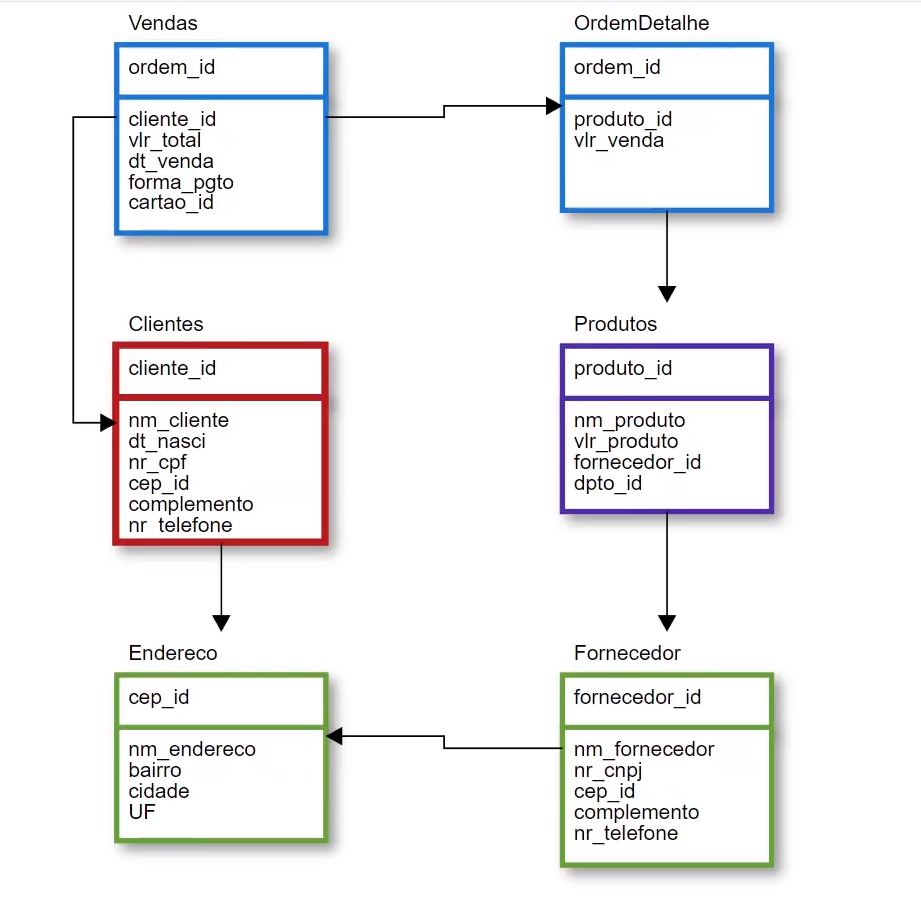

- **properties:** Dicionário que deverá conter o caminho do driver
- **url:** url do banco de dados
- **table:** tabela que vamos fazer a leitura dentro do banco de dados

In [ ]:
# Lendo tabela clientes:
db_clientes = spark.read.jdbc(properties = {'driver':'org.sqlite.JDBC'},
               url = 'jdbc:sqlite:/content/drive/MyDrive/Colab/vendas.db',
               table = 'clientes')

# Tabela produtos:
db_produtos = spark.read.jdbc(properties = {'driver':'org.sqlite.JDBC'},
               url = 'jdbc:sqlite:/content/drive/MyDrive/Colab/vendas.db',
               table = 'produtos')

# Tabela endereco:
db_ende = spark.read.jdbc(properties = {'driver':'org.sqlite.JDBC'},
               url = 'jdbc:sqlite:/content/drive/MyDrive/Colab/vendas.db',
               table = 'endereco')

# Tabela fornecedores:
db_forne = spark.read.jdbc(properties = {'driver':'org.sqlite.JDBC'},
               url = 'jdbc:sqlite:/content/drive/MyDrive/Colab/vendas.db',
               table = 'fornecedores')

# Tabela vendas:
db_vendas = spark.read.jdbc(properties = {'driver':'org.sqlite.JDBC'},
               url = 'jdbc:sqlite:/content/drive/MyDrive/Colab/vendas.db',
               table = 'vendas')

# Tabela ordemdetalhe:
db_ordem = spark.read.jdbc(properties = {'driver':'org.sqlite.JDBC'},
               url = 'jdbc:sqlite:/content/drive/MyDrive/Colab/vendas.db',
               table = 'ordemdetalhe')

In [ ]:
print('Clientes >>')
db_clientes.show(5, truncate = False)
print('Produtos >>')
db_produtos.show(5, truncate = False)
print('endereco >>')
db_ende.show(5, truncate = False)
print('fornecedores >>')
db_forne.show(5, truncate = False)
print('vendas >>')
db_vendas.show(5, truncate = False)
print('ordemDetalhe >>')
db_ordem.show(5, truncate = False)

Clientes >>
+----------+-----------------+------+----------+------+-----------+------------+
|cliente_id|nm_cliente       |nr_cpf|dt_nasci  |cep_id|complemento|nr_telefone |
+----------+-----------------+------+----------+------+-----------+------------+
|1820      |Vitor Hugo da Luz|108908|30-03-1986|512496|179,casa 1 |00-0910-2646|
|2275      |Ian Moreira      |163362|20-03-1983|965268|97,casa 1  |00-1365-3969|
|2730      |Nicole Silva     |217816|26-04-1989|931429|194,casa 3 |00-1820-5292|
|3185      |Enrico Araujo    |272270|18-11-1982|287560|304,casa 1 |00-2275-6615|
|3640      |Lara Nogueira    |326724|29-08-1988|840060|207,casa 1 |00-2730-7938|
+----------+-----------------+------+----------+------+-----------+------------+
only showing top 5 rows

Produtos >>
+----------+----------------+-------------+-----------------------+-----------+
|produto_id|nm_produto      |fornecedor_id|dpto_id                |vlr_produto|
+----------+----------------+-------------+-------------------

JOIN com chaves iguais:


In [ ]:
# JOIN da tabela VENDAS com CLIENTES.
# Veja que é mantido somente uma única coluna de referência, sem duas colunas iguais:
dfsales = db_vendas.join(db_clientes, on = 'cliente_id', how = 'left')
dfsales.show(10, truncate = False)

+----------+--------+----------+---------+----------+---------+---------------------+------+----------+------+-----------+------------+
|cliente_id|ordem_id|dt_venda  |vlr_total|forma_pgto|cartao_id|nm_cliente           |nr_cpf|dt_nasci  |cep_id|complemento|nr_telefone |
+----------+--------+----------+---------+----------+---------+---------------------+------+----------+------+-----------+------------+
|1820      |27288   |05-05-2022|18001.8  |pix       |         |Vitor Hugo da Luz    |108908|30-03-1986|512496|179,casa 1 |00-0910-2646|
|2275      |34110   |05-05-2022|20802.46 |pix       |         |Ian Moreira          |163362|20-03-1983|965268|97,casa 1  |00-1365-3969|
|2730      |40932   |05-05-2022|5000.4   |pix       |         |Nicole Silva         |217816|26-04-1989|931429|194,casa 3 |00-1820-5292|
|3185      |47754   |05-05-2022|4500.85  |pix       |         |Enrico Araujo        |272270|18-11-1982|287560|304,casa 1 |00-2275-6615|
|3640      |54576   |05-05-2022|200.34   |pix   

Encadeando JOINS

Após fazer o join de VENDAS com CLIENTES atráves da coluna 'cliente_id' temos um resultado de classe dataframe com o novo dataframe da junção.

Feito isso, o novo dataframe vai conter a coluna `ordem_id` que está presente na tabela ORDEMDETALHE, feito isso podemos fazer um segundo join, de maneira encadeada:

In [ ]:
dfsales2 = db_vendas.join(db_clientes, on = 'cliente_id', how = 'left')\
                    .join(db_ordem, on = 'ordem_id', how = 'left')

dfsales2.show(10, truncate = False)

+--------+----------+----------+---------+----------+---------+---------------------+------+----------+------+-----------+------------+----------+---------+
|ordem_id|cliente_id|dt_venda  |vlr_total|forma_pgto|cartao_id|nm_cliente           |nr_cpf|dt_nasci  |cep_id|complemento|nr_telefone |produto_id|vlr_venda|
+--------+----------+----------+---------+----------+---------+---------------------+------+----------+------+-----------+------------+----------+---------+
|61398   |4095      |05-05-2022|4500.45  |pix       |         |Carlos Eduardo da Paz|381178|05-01-1997|746023|121,casa 2 |00-3185-9261|1         |4500.45  |
|68220   |4550      |05-05-2022|6800.36  |pix       |         |Larissa Correia      |435632|15-07-1997|187173|309,casa 1 |00-3641-0584|2         |6800.36  |
|75042   |5005      |05-05-2022|5000.4   |pix       |         |Rafaela Viana        |490086|19-05-1996|931949|66,casa 3  |00-4096-1907|3         |5000.4   |
|88686   |5915      |05-05-2022|801.36   |pix       |     

In [ ]:
# 2 joins encadeados + GROUP BY + AGREGAÇÃO + ALIAS + ORDERBY:
db_vendas.join(db_clientes, on = 'cliente_id', how = 'left')\
        .join(db_ordem, on = 'ordem_id', how = 'left')\
        .groupBy(F.col('cliente_id'))\
        .agg(F.count(F.col('*')).alias('Total_QTD'), F.round(F.sum(F.col('vlr_total')), 2).alias('VlrVendas'))\
        .orderBy(F.col('VlrVendas').desc()).show(5, truncate = False)

+----------+---------+---------+
|cliente_id|Total_QTD|VlrVendas|
+----------+---------+---------+
|2275      |4        |83209.84 |
|1820      |4        |72007.2  |
|25025     |3        |61203.24 |
|6825      |1        |6800.36  |
|20475     |1        |6800.36  |
+----------+---------+---------+
only showing top 5 rows



**Usando a expressão booleana com F.when no método .agg() - Soma condicionada**

Fazer a operação (soma, média, contagem, etc) baseada em uma hipótese.
Suponha que queremos agrupar pela forma de pagamento, e fazer somente as somas das vendas de '05-05-2022'.

In [ ]:
# Condicionando a soma no groupBy:
db_vendas.groupBy(F.col('forma_pgto'))\
    .agg(
         F.sum(
              F.when(
                    F.col('dt_venda') == '05-05-2022', F.col('vlr_total')).otherwise(F.lit(0))).alias('Dia 5'),
                        F.sum('vlr_total').alias('Total todos dias')).show(truncate = False)

+--------------+-----------------+------------------+
|forma_pgto    |Dia 5            |Total todos dias  |
+--------------+-----------------+------------------+
|ted           |4700.79          |107011.89999999998|
|dinheiro      |0.0              |79308.80999999998 |
|pix           |90911.32999999999|90911.32999999999 |
|cartao credito|0.0              |16301.609999999999|
+--------------+-----------------+------------------+



O código executa várias operações de agregação em um DataFrame chamado `db_vendas`.

Aqui está uma explicação linha por linha do código:

1. `db_vendas`: DataFrame contendo dados das vendas.
2. `groupBy(F.col('forma_pgto'))`: Essa linha agrupa o DataFrame `db_vendas` pela coluna 'forma_pgto'. O método `groupBy()` é usado para criar grupos com base nos valores únicos encontrados na coluna especificada.
3. `agg(...)`: Essa linha inicia a operação de agregação no DataFrame agrupado. O método `agg()` permite que você especifique as operações de agregação a serem aplicadas.
4. `F.sum(...)`: Essa função de agregação calcula a soma dos valores.
5. `F.when(...)`: Essa função condicional é usada para aplicar uma lógica de condição dentro da função de agregação. No código, ela verifica se a coluna 'dt_venda' é igual a '05-05-2022'. Se a condição for verdadeira, retorna o valor da coluna 'vlr_total'; caso contrário, retorna 0.
6. `F.col('vlr_total')`: Representa a coluna 'vlr_total' do DataFrame.
7. `F.lit(0)`: Cria um valor literal de 0 para ser usado na condição de outra forma (caso contrário).
8. `F.sum('vlr_total')`: Calcula a soma da coluna 'vlr_total' para cada grupo.

Denominação:
O código realiza uma operação de agregação em um DataFrame agrupado pela coluna 'forma_pgto'. Ele calcula a soma dos valores da coluna 'vlr_total' para cada grupo, além de calcular a soma condicional dos valores da coluna 'vlr_total' quando a coluna 'dt_venda' é igual a '05-05-2022'. Em seguida, exibe o resultado.

## 5.1 Pivoteando uma tabela

No contexto do PySpark, o pivoteamento é uma operação que transforma linhas em colunas. Ele permite reorganizar os dados de forma que os valores de uma determinada coluna sejam transpostos para se tornarem colunas no DataFrame resultante. Essa operação é útil quando você deseja realizar análises ou transformações que envolvam a comparação ou agregação de valores em diferentes categorias.

A operação de pivoteamento é realizada usando a função `pivot()` disponível no PySpark. A função `pivot()` requer três parâmetros principais:

1. Coluna de referência: A coluna que será usada para criar as novas colunas no DataFrame resultante.
2. Valores distintos: Os valores únicos encontrados na coluna de referência que serão transformados em colunas.
3. Colunas de agregação: As colunas que serão agregadas quando os valores são pivoteados para as novas colunas.

A função `pivot()` agrupa os dados com base na coluna de referência e cria novas colunas para cada valor distinto encontrado. Em seguida, realiza uma agregação nos dados das colunas especificadas. O resultado final é um DataFrame onde as colunas pivoteadas contêm os valores agregados.

Aqui está um exemplo de código que demonstra o uso da função `pivot()` no PySpark:

```python
df_pivot = df.pivot('coluna_referencia', ['valores_distintos']).agg(F.sum('coluna_agregacao'))
```

Neste exemplo, o DataFrame df é pivoteado com base na coluna de referência "coluna_referencia". Os valores únicos encontrados nessa coluna se tornam as novas colunas no DataFrame resultante. A agregação é feita usando a função `sum()` na coluna de agregação "coluna_agregacao". O resultado é armazenado no DataFrame `df_pivot`.

Suponha que no código anterior necessitamos fazer o groupBy das vendas para todos os dias.

In [ ]:
# Aqui vemos os dias distintos da tabela:
db_vendas.select('dt_venda').distinct().show()

+----------+
|  dt_venda|
+----------+
|06-05-2022|
|05-05-2022|
|07-05-2022|
+----------+



In [ ]:
# Abaixo são os métodos do .groupBY e um deles é o pivot!
dir(db_vendas.groupBy(F.col('forma_pgto')))[28:]

['agg',
 'apply',
 'applyInPandas',
 'avg',
 'cogroup',
 'count',
 'max',
 'mean',
 'min',
 'pivot',
 'session',
 'sum']

In [ ]:
# O pivot recebe uma ou mais colunas que os valores vão virar as colunas de soma:
# Transformou a coluna forma de pagamento na chave, transformou os registros distinos de datas em colunas e somou:
db_vendas.groupBy(F.col('forma_pgto')).pivot('dt_venda').agg(F.round(F.sum('vlr_total'), 2)).show()

+--------------+----------+----------+----------+
|    forma_pgto|05-05-2022|06-05-2022|07-05-2022|
+--------------+----------+----------+----------+
|           ted|   4700.79|  37504.35|  64806.76|
|      dinheiro|      null|      null|  79308.81|
|           pix|  90911.33|      null|      null|
|cartao credito|      null|      null|  16301.61|
+--------------+----------+----------+----------+



# 6 - Trabalhando com booleanos em colunas
Expressões booleanas em colunas:

***Operadores de comparação***

- '==' : Igual
- '!=" : Diferente
- '>' : Maior
- '>=' : Maior ou igual
- '<' : Menor
- '<=' : Menor ou igual

***Operadores de lógicos***

- AND retorna TRUE quando todas as operações retornarem TRUE >> NO SPARK: &
- OR retorna TRUE quando pelo menos uma operação for verdadeiro >> NO SPARK: |

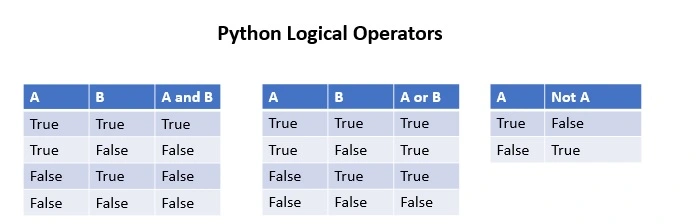


In [ ]:
# Exemplos de hipótese com Python retornando booleano (True or False):
print(10 == 10)

x = 'nome'
y = 'name'
print(x == y)

True
False


In [ ]:
# Select e passando uma expressão booleana na coluna NR_CPF onde seja menor que 300.000:
db_clientes.select(F.col('nm_cliente'),
                   F.col('nr_cpf'),
                   (F.col('nr_cpf') < 300000).alias('Booleano')).show(8, truncate = False)

+---------------------+------+--------+
|nm_cliente           |nr_cpf|Booleano|
+---------------------+------+--------+
|Vitor Hugo da Luz    |108908|true    |
|Ian Moreira          |163362|true    |
|Nicole Silva         |217816|true    |
|Enrico Araujo        |272270|true    |
|Lara Nogueira        |326724|false   |
|Carlos Eduardo da Paz|381178|false   |
|Larissa Correia      |435632|false   |
|Rafaela Viana        |490086|false   |
+---------------------+------+--------+
only showing top 8 rows



**Operação composta**

Retornando uma coluna booleana onde:
CLIENTE_ID é maior que 3000 e ao mesmo tempo o valor total é abaixo de 5000:

In [ ]:
db_vendas.select(F.col('ordem_id'),
                 F.col('cliente_id'),
                 F.col('vlr_total'),
                ((F.col('cliente_id') > 3000) & (F.col('vlr_total') < 5000)).alias('Verificação'))\
                .show(8, truncate = False)

+--------+----------+---------+-----------+
|ordem_id|cliente_id|vlr_total|Verificação|
+--------+----------+---------+-----------+
|27288   |1820      |18001.8  |false      |
|34110   |2275      |20802.46 |false      |
|40932   |2730      |5000.4   |false      |
|47754   |3185      |4500.85  |true       |
|54576   |3640      |200.34   |true       |
|61398   |4095      |4500.45  |true       |
|68220   |4550      |6800.36  |false      |
|75042   |5005      |5000.4   |false      |
+--------+----------+---------+-----------+
only showing top 8 rows



**Between**

Vendas entre 5000 e 50000.

Between pode ser usado com colunas também, ex: verificar se a coluna NASCIMENTO está entre START_DATE e END_DATE.

In [ ]:
db_vendas.select(F.col('cliente_id'),
                 F.col('vlr_total'),
                 F.col('vlr_total').between(5000, 50000).alias('Range valor')).show(8)

+----------+---------+-----------+
|cliente_id|vlr_total|Range valor|
+----------+---------+-----------+
|      1820|  18001.8|       true|
|      2275| 20802.46|       true|
|      2730|   5000.4|       true|
|      3185|  4500.85|      false|
|      3640|   200.34|      false|
|      4095|  4500.45|      false|
|      4550|  6800.36|       true|
|      5005|   5000.4|       true|
+----------+---------+-----------+
only showing top 8 rows



**Contains**

A função `F.contains()` no PySpark é usada para verificar se uma coluna de string contém uma determinada sequência de caracteres. Ela retorna uma expressão booleana que indica se a sequência está presente ou não na coluna.

A sintaxe básica da função `F.contains()` é a seguinte:

```python
F.contains(col, substring)
```

- `col`: É a coluna na qual você deseja procurar a sequência de caracteres.
- `substring`: É a sequência de caracteres que você deseja procurar na coluna.

A função `F.contains()` retorna uma expressão booleana, onde `True` indica que a sequência de caracteres foi encontrada na coluna e `False` indica que a sequência não foi encontrada.


In [ ]:
# Nomes que contém letra u:
db_clientes.select(F.col('nm_cliente'),
                   F.col('nm_cliente').contains('u').alias('Booleano U')).show(10,truncate = False)

+---------------------+----------+
|nm_cliente           |Booleano U|
+---------------------+----------+
|Vitor Hugo da Luz    |true      |
|Ian Moreira          |false     |
|Nicole Silva         |false     |
|Enrico Araujo        |true      |
|Lara Nogueira        |true      |
|Carlos Eduardo da Paz|true      |
|Larissa Correia      |false     |
|Rafaela Viana        |false     |
|Raul Carvalho        |true      |
|Lorenzo Novaes       |false     |
+---------------------+----------+
only showing top 10 rows



**isNotNull**

Testa se não é nulo.

In [ ]:
db_vendas.select(F.col('cliente_id'),
                 F.col('cliente_id').isNotNull().alias('É não nulo?')).show(5)

+----------+-----------+
|cliente_id|É não nulo?|
+----------+-----------+
|      1820|       true|
|      2275|       true|
|      2730|       true|
|      3185|       true|
|      3640|       true|
+----------+-----------+
only showing top 5 rows



**isNull**

Testa se é nulo:

In [ ]:
db_vendas.select(F.col('cliente_id'),
                 (F.col('cliente_id').isNull()).alias('É nulo?')).show(5)

+----------+-------+
|cliente_id|É nulo?|
+----------+-------+
|      1820|  false|
|      2275|  false|
|      2730|  false|
|      3185|  false|
|      3640|  false|
+----------+-------+
only showing top 5 rows



**isin**

Verifica se uma lista de valores (STRING, NÚMEROS ou os dois juntos) está dentro da coluna do dataframe:

Pode ser usado passando uma lista antes:
```python
lista = ['centro', 'Vicenza']
F.col('bairro').isin(lista)
```



In [ ]:
db_ende.select(F.col('*'),
               F.col('bairro').isin('centro', 'Vicenza').name('Bairro CENTRO ou VICENZA')).show(truncate = False)

+------+--------------------------+-----------+--------------+---+------------------------+
|cep   |nm_endereco               |bairro     |cidade        |uf |Bairro CENTRO ou VICENZA|
+------+--------------------------+-----------+--------------+---+------------------------+
|305095|av jucelino cursino       |centro     |São paulo     |SP |true                    |
|303989|av brasil                 |centro     |São paulo     |SP |true                    |
|400487|av interlargos            |centro     |São paulo     |SP |true                    |
|512496|av copacabana             |centro     |Rio de Janeiro|RJ |true                    |
|965268|rua dom pedro primeiro    |centro     |São paulo     |SP |true                    |
|931429|rua vicente giacaline     |Vila zilda |São paulo     |SP |false                   |
|287560|rua governador valadares  |Vila zilda |São paulo     |SP |false                   |
|840060|rua sérgio vicente        |Vila zilda |São paulo     |SP |false         

In [ ]:
# Usando o ~ o Python sempre vai negar a condição e vai fazer o contrário, onde é falso vira verdadeiro:

db_ende.select(F.col('*'),
               (~F.col('bairro').isin('centro', 'Vicenza')).alias('Bairro CENTRO ou VICENZA')).show(truncate = False)

+------+--------------------------+-----------+--------------+---+------------------------+
|cep   |nm_endereco               |bairro     |cidade        |uf |Bairro CENTRO ou VICENZA|
+------+--------------------------+-----------+--------------+---+------------------------+
|305095|av jucelino cursino       |centro     |São paulo     |SP |false                   |
|303989|av brasil                 |centro     |São paulo     |SP |false                   |
|400487|av interlargos            |centro     |São paulo     |SP |false                   |
|512496|av copacabana             |centro     |Rio de Janeiro|RJ |false                   |
|965268|rua dom pedro primeiro    |centro     |São paulo     |SP |false                   |
|931429|rua vicente giacaline     |Vila zilda |São paulo     |SP |true                    |
|287560|rua governador valadares  |Vila zilda |São paulo     |SP |true                    |
|840060|rua sérgio vicente        |Vila zilda |São paulo     |SP |true          

**like**

Comum ao SQL:

In [ ]:
db_clientes.select(F.col('nm_cliente'),
                  F.col('nm_cliente').like('%a')).show(5, truncate = False)

+-----------------+------------------+
|nm_cliente       |nm_cliente LIKE %a|
+-----------------+------------------+
|Vitor Hugo da Luz|false             |
|Ian Moreira      |true              |
|Nicole Silva     |true              |
|Enrico Araujo    |false             |
|Lara Nogueira    |true              |
+-----------------+------------------+
only showing top 5 rows



**rlike**

Retorna booleano misturando expressão like com regex.

Eficaz quando precisamos buscar dentro de um campo texto, palavras ou pedaços de palavras lá dentro.

In [ ]:
# Somente com like:

# Lista com coisas que quero buscar
lista = ['uz', 'ore', 'ssa']

# Existe um método JOIN para string que pega uma lista e concatena separado pelo que é indicado na string:
'|'.join(lista)

print('|'.join(lista))

# Ele vai buscar os elementos da lista que contém tudo que está na lista:
db_clientes.select(F.col('nm_cliente'),
                   F.col('nm_cliente').rlike('|'.join(lista))).show(10, truncate = False)

uz|ore|ssa
+---------------------+-----------------------------+
|nm_cliente           |RLIKE(nm_cliente, uz|ore|ssa)|
+---------------------+-----------------------------+
|Vitor Hugo da Luz    |true                         |
|Ian Moreira          |true                         |
|Nicole Silva         |false                        |
|Enrico Araujo        |false                        |
|Lara Nogueira        |false                        |
|Carlos Eduardo da Paz|false                        |
|Larissa Correia      |true                         |
|Rafaela Viana        |false                        |
|Raul Carvalho        |false                        |
|Lorenzo Novaes       |true                         |
+---------------------+-----------------------------+
only showing top 10 rows



**when** (Ideia do case WHEN do SQL)

`Functions.when()` é uma função condicional que permite realizar transformações em um DataFrame com base em condições específicas. Basicamento verifica uma condição e retorna um string que definimos quando for TRUE e outra para false.

A sintaxe básica da função `when()` é a seguinte:

```python
dataframe.withColumn('nova_coluna', F.when(condicao, valor_se_verdadeiro).otherwise(valor_se_falso))
```

Aqui está uma explicação dos parâmetros:

- `condicao`: É uma expressão booleana que define a condição a ser avaliada. Se a condição for avaliada como verdadeira, a função `when()` retornará o valor especificado em `valor_se_verdadeiro`. Caso contrário, retornará o valor especificado em `valor_se_falso`.
- `valor_se_verdadeiro`: É o valor a ser retornado se a condição for avaliada como verdadeira.
- `valor_se_falso`: É o valor a ser retornado se a condição for avaliada como falsa.

A função `when()` pode ser usada em conjunto com outras funções de transformação disponíveis no PySpark para criar colunas calculadas com base em condições. Aqui está um exemplo para ilustrar seu uso:

```python
data = [('Alice', 25), ('Bob', 30), ('Charlie', 35)]
df = spark.createDataFrame(data, ['name', 'age'])

df.withColumn('category', when(col('age') < 30, 'Young').otherwise('Old')).show()
```


In [ ]:
# When com a condição se o nome conter SILVA vai ser TRUE retornando FAMILIA SILVA:
db_clientes.select(F.col('nm_cliente'),
                   F.when(F.col('nm_cliente').contains('Silva'), 'Familia Silva')\
                   .alias('Bool')).show(5, truncate = False)

+-----------------+-------------+
|nm_cliente       |Bool         |
+-----------------+-------------+
|Vitor Hugo da Luz|null         |
|Ian Moreira      |null         |
|Nicole Silva     |Familia Silva|
|Enrico Araujo    |null         |
|Lara Nogueira    |null         |
+-----------------+-------------+
only showing top 5 rows



Otherwise (Ideia do ELSE)

In [ ]:
# Aqui passamos um OTHERWISE para caso seja FALSE:
db_clientes.select(F.col('nm_cliente'),
                   F.col('nm_cliente').contains('Silva').alias('Contem?'),
                   F.when(F.col('nm_cliente').contains('Silva'), 'Familia Silva').otherwise('Outras familias'))\
                   .show(5, truncate = False)

+-----------------+-------+---------------------------------------------------------------------------------+
|nm_cliente       |Contem?|CASE WHEN contains(nm_cliente, Silva) THEN Familia Silva ELSE Outras familias END|
+-----------------+-------+---------------------------------------------------------------------------------+
|Vitor Hugo da Luz|false  |Outras familias                                                                  |
|Ian Moreira      |false  |Outras familias                                                                  |
|Nicole Silva     |true   |Familia Silva                                                                    |
|Enrico Araujo    |false  |Outras familias                                                                  |
|Lara Nogueira    |false  |Outras familias                                                                  |
+-----------------+-------+---------------------------------------------------------------------------------+
only showi

In [ ]:
# When com multiplas condições:
db_clientes.select(F.col('nm_cliente'),
                   (F.col('nm_cliente').contains('Silva') | F.col('nm_cliente').contains('Luz')).name('Bool'),
                   F.when(F.col('nm_cliente').contains('Silva'), 'Familia Silva').\
                   when(F.col('nm_cliente').contains('Luz'), 'Familia Luz').otherwise('Outra familia').\
                   alias('Familia')).show(5, truncate = False)

+-----------------+-----+-------------+
|nm_cliente       |Bool |Familia      |
+-----------------+-----+-------------+
|Vitor Hugo da Luz|true |Familia Luz  |
|Ian Moreira      |false|Outra familia|
|Nicole Silva     |true |Familia Silva|
|Enrico Araujo    |false|Outra familia|
|Lara Nogueira    |false|Outra familia|
+-----------------+-----+-------------+
only showing top 5 rows



Atualizando valor de uma coluna com when

In [ ]:
db_clientes.orderBy(F.col('cep_id'))\
    .withColumn('cep_id_nova', F.when(F.col('cep_id').isNull(), F.lit('123')).otherwise(F.col('cep_id'))).show(10)

+----------+------------------+-------+----------+------+-----------+------------+-----------+
|cliente_id|        nm_cliente| nr_cpf|  dt_nasci|cep_id|complemento| nr_telefone|cep_id_nova|
+----------+------------------+-------+----------+------+-----------+------------+-----------+
|     27300|     Vicente Gomes|3158332|10-06-1995|  null| 215,casa 1|02-6397-6734|        123|
|     26390|     luiz Caldeira|3049424|18-07-1990|  null| 368,casa 1|02-5487-4088|        123|
|     27755|  Vitor Cavalcanti|3212786|12-09-1986|  null| 148,casa 1|02-6852-8057|        123|
|     26845|    Pietro Cardoso|3103878|01-07-1996|  null| 368,casa 3|02-5942-5411|        123|
|     28210|Maria Alice Barros|3267240|04-12-1990|  null|  75,casa 2|02-7307-9380|        123|
|     10010|    Lorena Azevedo|1089080|22-11-1995|187173| 325,casa 3|00-9102-6460|     187173|
|     20930|    Alana Monteiro|2395976|13-03-1983|187173|  92,casa 1|02-0025-8212|     187173|
|      4550|   Larissa Correia| 435632|15-07-1997|

# 7 - SQL com PYSPARK

Utiliza o metastore do HIVE, não é preciso ter o HIVE instalado para usar o Spark.

O Spark SQL armazena as views criadas na memória do cluster enquanto a sessão do Spark estiver ativa, a menos que você configure o Hive Metastore para persistir as definições de view em um banco de dados externo.

`df.createTempView()` e `df.write.saveAsTable()` são duas operações diferentes no Spark que lidam com dados persistentes, mas em contextos distintos.

- `df.createTempView()`: Essa operação é usada para criar uma exibição temporária (temp view) de um DataFrame no Spark. A exibição temporária é registrada apenas para a sessão atual do Spark e não persiste além disso. A exibição temporária permite que você consulte o DataFrame usando SQL ou a API DataFrame, como se fosse uma tabela. No entanto, a exibição temporária não é armazenada permanentemente no catálogo do Spark. Ela é útil para consultas e transformações temporárias que não exigem persistência.

Exemplo de uso do `df.createTempView()`:
```python
df.createTempView('nome_da_exibicao_temporaria')
spark.sql('SELECT * FROM nome_da_exibicao_temporaria').show()
```

- `df.write.saveAsTable()`: Essa operação é usada para salvar um DataFrame como uma tabela persistente no catálogo do Spark. A tabela será armazenada permanentemente no formato e localização especificados e poderá ser acessada e consultada posteriormente em diferentes sessões do Spark. Ao salvar como tabela, você pode especificar opções de formato, localização, particionamento, esquema, entre outros.

Exemplo de uso do `df.write.saveAsTable()`:
```python
df.write.saveAsTable('nome_da_tabela')
spark.sql('SELECT * FROM nome_da_tabela').show()
```

Em resumo, `df.createTempView()` cria uma exibição temporária para consultas e transformações temporárias, enquanto `df.write.saveAsTable()` salva o DataFrame como uma tabela persistente no catálogo do Spark para uso futuro.

O dataframe quando saimos da sessão ele se perde, a tabela não! É um objeto persistente, tabular e reside em um banco de dados quando criado uma tabela.

A tabela e o dataframe são facilmente interoperáveis, é possivel transformar um em outro de forma muito simples. Tabelas gerenciadas possuem localização física e por padrão são armazenadas no formato parquet.

In [ ]:
# Obtenha o valor de spark.sql.warehouse.dir
diretorio = spark.conf.get('spark.sql.warehouse.dir')

print('Diretório de armazenamento persistente das tabelas HIVE:', diretorio)

Diretório de armazenamento persistente das tabelas HIVE: file:/content/spark-warehouse


In [ ]:
# Visualizando tabelas do Spark, só existe a default:
spark.sql('show databases').show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [ ]:
# Criando database:
spark.sql('create database TESTEPY')

# Usando o database criado para trabalhar com ele:
spark.sql('use TESTEPY')

# Visualizando
spark.sql('show databases').show()

+---------+
|namespace|
+---------+
|  default|
|  testepy|
+---------+



In [ ]:
# Criando uma tabela **GERENCIADA** a partir de um dataframe e dando um nome a ela:
dfdp.write.saveAsTable('DESPACHANTES')

# Modo para sobrescrever/recriar a tabela:
dfdp.write.mode('overwrite').saveAsTable('DESPACHANTES')

# Dessa forma o spark vai salvar a tabela appendando, ou seja, acrescentando novos registros:
dfdp.write.mode('append').saveAsTable('DESPACHANTES')

# Visualizando as tabelas depois de criar:
spark.sql('show tables').show()

+---------+------------+-----------+
|namespace|   tableName|isTemporary|
+---------+------------+-----------+
|  testepy|despachantes|      false|
+---------+------------+-----------+



Quando usamos o método saveAsTable() em um DataFrame, estamos salvando os dados do DataFrame como uma tabela em um banco de dados ou catálogo de metadados associado ao ambiente Spark. Essa tabela é considerada "gerenciada" (managed table) porque o Spark assume a responsabilidade de gerenciar o armazenamento dos dados e os metadados associados a ela.

In [ ]:
# Usando SQL, ele retorna um dataframe, pode usar show ou atribuir a uma variável:
despachante = spark.sql('select * from despachantes')
despachante.show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles|

Como temos a tabela gerenciada despachante gerada atráves do dataframe de mesmo nome, quando encerramos a sessão já não vai existir mais o dataframe, porém a tabela dessa forma gerenciada estará salva. ***(Não no caso do Colab que deleta todo o ambiente)***

**Tabela não gerenciada:**
Salvar usando option para passar o caminho (chave/valor)

In [ ]:
dfdp.write.option('path', '/home/vinicius/desparquet').saveAsTable('despachantes_ng')

In [ ]:
spark.sql('select * from despachantes_ng').show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



Como saber se uma tabela é gerenciada ou não?

In [ ]:
# Verificando as tabelas do database selecionado (TESTEPY):
spark.catalog.listTables()

[Table(name='despachantes', database='testepy', description=None, tableType='MANAGED', isTemporary=False),
 Table(name='despachantes_ng', database='testepy', description=None, tableType='EXTERNAL', isTemporary=False)]

## 7.1 - **Criando views**

In [ ]:
# Criando view temporária:
dfdp.createOrReplaceTempView('DESPACHANTE_VIEW1')

In [ ]:
# Consultando view:
spark.sql('SELECT * FROM DESPACHANTE_VIEW1').show(5, truncate = False)

+---+-------------------+------+-------------+------+----------+
|id |nome               |status|cidade       |vendas|data      |
+---+-------------------+------+-------------+------+----------+
|1  |Carminda Pestana   |Ativo |Santa Maria  |23    |2020-08-11|
|2  |Deolinda Vilela    |Ativo |Novo Hamburgo|34    |2020-03-05|
|3  |Emídio Dornelles   |Ativo |Porto Alegre |34    |2020-02-05|
|4  |Felisbela Dornelles|Ativo |Porto Alegre |36    |2020-02-05|
|5  |Graça Ornellas     |Ativo |Porto Alegre |12    |2020-02-05|
+---+-------------------+------+-------------+------+----------+
only showing top 5 rows



In [ ]:
# Criando view global com Python:
dfdp.createOrReplaceGlobalTempView('DESPACHANTE_VIEW2')

In [ ]:
# Consultando view:
spark.sql('select * from global_temp.DESPACHANTE_VIEW2').show(5, truncate = False)

+---+-------------------+------+-------------+------+----------+
|id |nome               |status|cidade       |vendas|data      |
+---+-------------------+------+-------------+------+----------+
|1  |Carminda Pestana   |Ativo |Santa Maria  |23    |2020-08-11|
|2  |Deolinda Vilela    |Ativo |Novo Hamburgo|34    |2020-03-05|
|3  |Emídio Dornelles   |Ativo |Porto Alegre |34    |2020-02-05|
|4  |Felisbela Dornelles|Ativo |Porto Alegre |36    |2020-02-05|
|5  |Graça Ornellas     |Ativo |Porto Alegre |12    |2020-02-05|
+---+-------------------+------+-------------+------+----------+
only showing top 5 rows



In [ ]:
# Criando view usando SQL:
spark.sql('CREATE OR REPLACE TEMP VIEW DESPACHANTE_VIEW3 AS SELECT * FROM despachantes')

spark.sql('CREATE OR REPLACE GLOBAL TEMP VIEW DESPACHANTE_VIEW4 AS SELECT * FROM despachantes')

DataFrame[]

Como apagar as views

In [ ]:
spark.catalog.dropTempView('DESPACHANTE_VIEW3')
spark.catalog.dropGlobalTempView('DESPACHANTE_VIEW4')

True

In [ ]:
# Exemplo de uma mesma operação com Spark.sql e Pyspark:
spark.sql('select cidade, sum(vendas) from DESPACHANTE_VIEW1 group by cidade order by 2 desc').show()

dfdp.groupBy('cidade').agg(F.sum(F.col('vendas'))).orderBy(F.col('sum(vendas)').desc()).show()

+-------------+-----------+
|       cidade|sum(vendas)|
+-------------+-----------+
| Porto Alegre|        223|
|  Santa Maria|         68|
|Novo Hamburgo|         34|
+-------------+-----------+

+-------------+-----------+
|       cidade|sum(vendas)|
+-------------+-----------+
| Porto Alegre|        223|
|  Santa Maria|         68|
|Novo Hamburgo|         34|
+-------------+-----------+



## 7.2 **JOIN com SQL**

In [ ]:
recschema = 'idrec INT, datarec STRING, iddesp INT'

# Carregando dataframe reclamações para fazer join com despachante:
reclamacoes = spark.read.csv('/content/drive/MyDrive/Colab/reclamacoes.csv', header = False, schema = recschema)

# Criar temp view:
reclamacoes.createOrReplaceTempView('RECLAMACOES_VIEW1')

In [ ]:
spark.sql('''
SELECT *
FROM RECLAMACOES_VIEW1 AS R
LEFT JOIN DESPACHANTE_VIEW1 AS D ON (R.iddesp = D.id)
          ''').show()

+-----+----------+------+---+-------------------+------+-------------+------+----------+
|idrec|   datarec|iddesp| id|               nome|status|       cidade|vendas|      data|
+-----+----------+------+---+-------------------+------+-------------+------+----------+
|    1|2020-09-12|     2|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|    2|2020-09-11|     2|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|    3|2020-10-05|     4|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|    4|2020-10-02|     5|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|    5|2020-12-06|     5|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|    6|2020-01-09|     5|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|    7|2020-01-05|     9|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
+-----+----------+------+---+-------------------+------+-------------+------+----------+



# 8 - Window Functions

Resumidamente é como criar subdataframes dentro do dataframe que estamos manipulando. Definição da janela, é pegar um dataframe e retirar um range de informações baseado no particionamento, ou baseado num range mesmo de linhas.

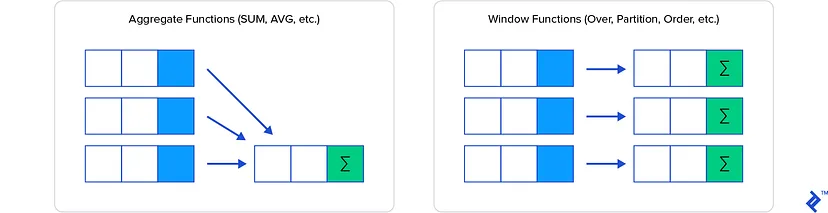

A window, ao contrário do groupBy, em vez de retornar apenas uma linha sumarizada, ele trás a base da maneira que ela é só que com uma operação na coluna que estamos acrescentando.

https://sparkbyexamples.com/pyspark/pyspark-window-functions/

https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.Window.html

https://www.geeksforgeeks.org/pyspark-window-functions/

In [ ]:
# Primeiro passo importar a classe Window:
from pyspark.sql.window import Window as W

In [ ]:
# Dir para ver os métodos:
dir(W)[31:]

['currentRow',
 'orderBy',
 'partitionBy',
 'rangeBetween',
 'rowsBetween',
 'unboundedFollowing',
 'unboundedPreceding']

In [ ]:
# Carregando dataframe:
dfu = spark.read.parquet('/content/drive/MyDrive/Colab/funcionarios.parquet')

**W.partitionBy()**

É usado para especificar como os dados serão particionados ou agrupados antes de serem processados pela função de janela. Pode ser usado uma ou mais colunas, que serão usadas para agrupar os dados em partições distintas antes de aplicar funções de agregação ou transformações de janela.

In [ ]:
# Criando uma janela com particionamento pela coluna departamento:
window = W.partitionBy('departamento')

Operações de soma, média, contagem dentro de uma partição! (Funções de agregação).

O .over() é usado para especificar uma janela de operação, que nesse caso é a variável window criada no bloco anterior, ela determina o conjunto de linhas sobre as quais uma função de janela será aplicada.

In [ ]:
# Com a janela definida, criamos 3 colunas de operações analíticas com base no salário (média, total e contagem).
data = dfu.withColumn('media_salarios', F.round(F.avg(F.col('salario')).over(window), 2))\
          .withColumn('soma_salarios', F.round(F.sum(F.col('salario')).over(window), 2))\
          .withColumn('contagem_salarios', F.count(F.col('salario')).over(window))\
          .orderBy('diretoria', 'departamento', 'cargo')

In [ ]:
# Resultado do agrupamento por departamento, veja que as colunas geradas são com base no agrupamento do departamento:
data.orderBy('departamento').show(13, truncate = False)

+--------------------+------+----------------+------------+-------------------------+-------+--------------+-------------+-----------------+
|Nome                |MatFun|diretoria       |departamento|cargo                    |salario|media_salarios|soma_salarios|contagem_salarios|
+--------------------+------+----------------+------------+-------------------------+-------+--------------+-------------+-----------------+
|João Lucas Cunha    |t7533 |Recursos Humanos|Admissao    |analista de Admissao 2   |5899.25|7077.76       |28311.02     |4                |
|Davi Luiz Rodrigues |t7330 |Recursos Humanos|Admissao    |analista de Admissao 2   |6746.8 |7077.76       |28311.02     |4                |
|Joana da Mata       |t9364 |Recursos Humanos|Admissao    |analista de Admissao 3   |9884.25|7077.76       |28311.02     |4                |
|Felipe Azevedo      |t8975 |Recursos Humanos|Admissao    |analista de Admissao 2   |5780.72|7077.76       |28311.02     |4                |
|Maria Alice 

Criando uma janela com particionamento + orderBy.

Ao usar somente o .partitionBy(), as funções são aplicadas dentro dos dados de uma partição sem uma ordem específica, ao adicionar o .orderBy() os dados são odernados de acordo com as colunas especificadas.

In [ ]:
# Ordenando pela coluna salario.
window = W.partitionBy('departamento').orderBy(F.col('salario').desc())

Agora com uma ordenação, ao usar as mesmas operações feitas anteriormente, elas serão aplicadas de forma cumulativa dentro de cada partição definida:

In [ ]:
data = dfu.withColumn('media_salarios', F.round(F.avg(F.col('salario')).over(window), 2))\
          .withColumn('soma_salarios', F.round(F.sum(F.col('salario')).over(window), 2))\
          .withColumn('contagem_salarios', F.count(F.col('salario')).over(window))\
          .orderBy('diretoria', 'departamento', 'cargo')

In [ ]:
# Resultado:
data.orderBy('departamento', F.col('salario').desc()).show(13, truncate = False)

+--------------------+------+----------------+------------+-------------------------+-------+--------------+-------------+-----------------+
|Nome                |MatFun|diretoria       |departamento|cargo                    |salario|media_salarios|soma_salarios|contagem_salarios|
+--------------------+------+----------------+------------+-------------------------+-------+--------------+-------------+-----------------+
|Joana da Mata       |t9364 |Recursos Humanos|Admissao    |analista de Admissao 3   |9884.25|9884.25       |9884.25      |1                |
|Davi Luiz Rodrigues |t7330 |Recursos Humanos|Admissao    |analista de Admissao 2   |6746.8 |8315.53       |16631.05     |2                |
|João Lucas Cunha    |t7533 |Recursos Humanos|Admissao    |analista de Admissao 2   |5899.25|7510.1        |22530.3      |3                |
|Felipe Azevedo      |t8975 |Recursos Humanos|Admissao    |analista de Admissao 2   |5780.72|7077.76       |28311.02     |4                |
|Alice Barbos

**Funções de ranking:**

**F.row_number()**

Cria uma sequência númerica de acordo com a janela, coluna departamento.

In [ ]:
dfu.withColumn('row_number', F.row_number().over(window)).show(13, truncate = False)

+--------------------+------+----------------+------------+-------------------------+-------+----------+
|Nome                |MatFun|diretoria       |departamento|cargo                    |salario|row_number|
+--------------------+------+----------------+------------+-------------------------+-------+----------+
|Joana da Mata       |t9364 |Recursos Humanos|Admissao    |analista de Admissao 3   |9884.25|1         |
|Davi Luiz Rodrigues |t7330 |Recursos Humanos|Admissao    |analista de Admissao 2   |6746.8 |2         |
|João Lucas Cunha    |t7533 |Recursos Humanos|Admissao    |analista de Admissao 2   |5899.25|3         |
|Felipe Azevedo      |t8975 |Recursos Humanos|Admissao    |analista de Admissao 2   |5780.72|4         |
|Alice Barbosa       |t7343 |Recursos Humanos|Afastamento |analista de Afastamento 3|8867.87|1         |
|Rafael Freitas      |t7067 |Recursos Humanos|Afastamento |analista de Afastamento 2|4710.73|2         |
|Alexia Nascimento   |t6581 |Recursos Humanos|Afastamen

**F.rank()**

Atribui uma classificação a cada registro dentro da janela, levando em consideração a ordem de classificação especificada no orderBy. Pode parecer semelhante ao row_number(), porém, registros com valores iguais na coluna de ordenação recebem a mesma classificação "empate".

Quando tem o empate, a classificação será incrementada, pulando os números correspondentes aos registros empatados. Por exemplo, se dois registros estiverem empatados no segundo lugar na ordenação, ambos receberão a classificação 2 e o próximo registro receberá a classificação de quarto lugar.

In [ ]:
# Exemplo no departamento banco de dados, onde duas pessoas tem o mesmo salário:
dfu.withColumn('rank', F.rank().over(window))\
    .where(F.col('departamento') == 'Banco de dados').show(13, truncate = False)

+---------------------+------+----------+--------------+----------------------------+-------+----+
|Nome                 |MatFun|diretoria |departamento  |cargo                       |salario|rank|
+---------------------+------+----------+--------------+----------------------------+-------+----+
|Ian Moreira          |t6445 |Tecnologia|Banco de dados|analista de Banco de dados 3|9181.3 |1   |
|Pedro Cesar          |t6446 |Tecnologia|Banco de dados|analista de Banco de dados 3|9181.3 |1   |
|Vitor Hugo da Luz    |t9058 |Tecnologia|Banco de dados|analista de Banco de dados 3|7732.52|3   |
|Nicole Silva         |t6792 |Tecnologia|Banco de dados|analista de Banco de dados 3|6548.83|4   |
|Enrico Araújo        |t6756 |Tecnologia|Banco de dados|analista de Banco de dados 2|4429.73|5   |
|Lara Nogueira        |t9991 |Tecnologia|Banco de dados|analista de Banco de dados 1|2229.43|6   |
|Carlos Eduardo da Paz|t8652 |Tecnologia|Banco de dados|analista de Banco de dados 1|2168.45|7   |
+---------

**F.dense_rank()**

Resolve o problema do empate do rank, atribuindo na sequência o próximo classificado:

In [ ]:
# Mesmo exemplo anterior:
dfu.withColumn('rank', F.dense_rank().over(window))\
    .where(F.col('departamento') == 'Banco de dados').show(13, truncate = False)

+---------------------+------+----------+--------------+----------------------------+-------+----+
|Nome                 |MatFun|diretoria |departamento  |cargo                       |salario|rank|
+---------------------+------+----------+--------------+----------------------------+-------+----+
|Ian Moreira          |t6445 |Tecnologia|Banco de dados|analista de Banco de dados 3|9181.3 |1   |
|Pedro Cesar          |t6446 |Tecnologia|Banco de dados|analista de Banco de dados 3|9181.3 |1   |
|Vitor Hugo da Luz    |t9058 |Tecnologia|Banco de dados|analista de Banco de dados 3|7732.52|2   |
|Nicole Silva         |t6792 |Tecnologia|Banco de dados|analista de Banco de dados 3|6548.83|3   |
|Enrico Araújo        |t6756 |Tecnologia|Banco de dados|analista de Banco de dados 2|4429.73|4   |
|Lara Nogueira        |t9991 |Tecnologia|Banco de dados|analista de Banco de dados 1|2229.43|5   |
|Carlos Eduardo da Paz|t8652 |Tecnologia|Banco de dados|analista de Banco de dados 1|2168.45|6   |
+---------

**Funções de deslocamento:**

**F.lag()**

É usada para retornar o valor de uma coluna em uma linha anterior dentro de uma janela. Função útil para realizar cálculos que envolvem comparação entre valores consecutivos em uma ordem específica!

Recebe como argumento a coluna e o offset, que deve ser um inteiro para especificar quantas linhas para trás deseja ir. Valor positivo retorna um valor de linhas anteriores, um valor negativo retorna um valor de linhas posteriores.

In [ ]:
dfu.withColumn('lag', F.lag(F.col('salario'), 1).over(window)).show(13, truncate = False)

+--------------------+------+----------------+------------+-------------------------+-------+-------+
|Nome                |MatFun|diretoria       |departamento|cargo                    |salario|lag    |
+--------------------+------+----------------+------------+-------------------------+-------+-------+
|Joana da Mata       |t9364 |Recursos Humanos|Admissao    |analista de Admissao 3   |9884.25|null   |
|Davi Luiz Rodrigues |t7330 |Recursos Humanos|Admissao    |analista de Admissao 2   |6746.8 |9884.25|
|João Lucas Cunha    |t7533 |Recursos Humanos|Admissao    |analista de Admissao 2   |5899.25|6746.8 |
|Felipe Azevedo      |t8975 |Recursos Humanos|Admissao    |analista de Admissao 2   |5780.72|5899.25|
|Alice Barbosa       |t7343 |Recursos Humanos|Afastamento |analista de Afastamento 3|8867.87|null   |
|Rafael Freitas      |t7067 |Recursos Humanos|Afastamento |analista de Afastamento 2|4710.73|8867.87|
|Alexia Nascimento   |t6581 |Recursos Humanos|Afastamento |analista de Afastamento

**.rowsBetween()**

Outro método de uma janela, serve para especificar um intervalo de linhas para serem incluídas na janela. Pode-se definir as fronteiras de início e fim usando as opções Window.unboundedPreceding, Window.unboundedFollowing, Window.currentRow ou valores inteiros.

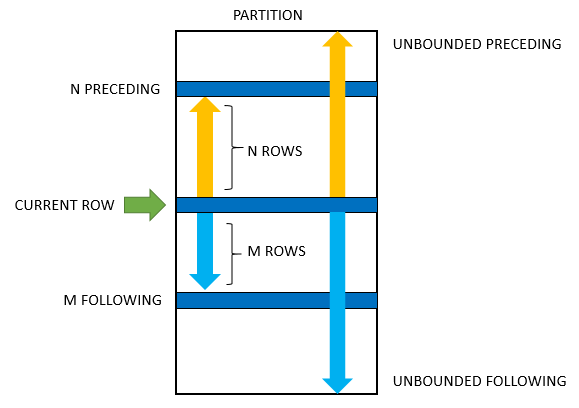

Abaixo, rowsBetween(W.currentRow, 2) define que as operações de janela serão aplicadas a cada grupo de 3 linhas consecutivas, incluindo a linha atual e as próximas 2 dentro de cada partição definida pela coluna 'departamento', ordenadas pela coluna 'salario'.

In [ ]:
window2 = W.partitionBy(F.col('departamento')).orderBy(F.col('salario')).rowsBetween(W.currentRow, 2)

In [ ]:
# Fazendo a soma de cada 3 intervalos:
dfu.withColumn('between_sum', F.sum(F.col('salario')).over(window2))\
    .where(F.col('departamento') == 'Recrutamento').show(truncate = False)

+--------------------+------+----------------+------------+--------------------------+-------+------------------+
|Nome                |MatFun|diretoria       |departamento|cargo                     |salario|between_sum       |
+--------------------+------+----------------+------------+--------------------------+-------+------------------+
|Luiz Otávio Sales   |t9740 |Recursos Humanos|Recrutamento|analista de Recrutamento 1|1542.64|8274.95           |
|João Vitor Farias   |t7928 |Recursos Humanos|Recrutamento|analista de Recrutamento 1|2015.99|11810.439999999999|
|Caroline Cunha      |t8456 |Recursos Humanos|Recrutamento|analista de Recrutamento 2|4716.32|16407.760000000002|
|Augusto Nogueira    |t6569 |Recursos Humanos|Recrutamento|analista de Recrutamento 2|5078.13|18425.72          |
|Manuela Araújo      |t8109 |Recursos Humanos|Recrutamento|analista de Recrutamento 3|6613.31|20719.239999999998|
|Maria Sophia Martins|t7126 |Recursos Humanos|Recrutamento|analista de Recrutamento 2|67

# 9 - Performance e tuning

Lazy evaluation, ou "avaliação preguiçosa", é um conceito importante no Spark. Basicamente é uma estratégia na qual as transformações de dados não são executadas imediatamente quando são chamadas, mas são adiadas até que uma ação seja acionada.

Em vez de executar todas as transformações imediatamente, o Spark mantém um registro das operações que devem ser realizadas e somente quando uma ação é chamada, como .show() ou .write() dentre outras, que as transformações são executadas em cascata.

*Um exemplo lúdico para entender o conceito de lazy evaluation:*

Imagine que você está organizando uma festa com seus amigos e tem uma lista de reprodução de músicas. Em vez de tocar todas as músicas imediatamente, você cria um plano de execução que define as transformações que deseja aplicar às músicas, como filtrar por gênero ou ordenar por popularidade. As músicas só são processadas e tocadas quando alguém aperta o botão de reprodução.

Essa abordagem traz benefícios significativos, pois evita a execução desnecessária de transformações intermediárias e permite ao Spark otimizar o plano de execução com base nas ações solicitadas. Ele pode evitar processar dados desnecessariamente e economizar recursos de processamento.

Em resumo, a lazy evaluation no Spark adia a execução das transformações até que uma ação seja acionada, isso traz benefícios de otimização e eficiência no processamento de dados.

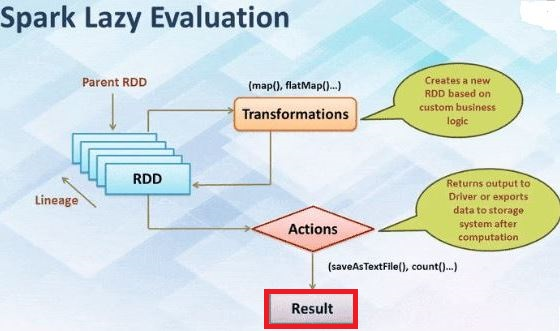

**.explain()**

Método presente no dataframe, ele vai mostrar o plano lógico das transformações que o dataframe sofrerá até chegar no método de ação.

Repare abaixo que ele está encadeado da útilma transformação que estará no topo, para a primeira transformação que estará no ínicio.

`Parsed logical plan:` Plano lógico construído no código.

`Optimized logical plan:` É após compreender todas as transformações, ele otimiza o plano lógico e esse será o plano lógico que vai ser aplicado quando invocado o método de ação.            

In [ ]:
# Até o momento, ele somente leu o dataframe e trouxe as colunas, só tem essa ação para ser feita.
dfu.explain(True)

== Parsed Logical Plan ==
Relation [Nome#0,MatFun#1,diretoria#2,departamento#3,cargo#4,salario#5] parquet

== Analyzed Logical Plan ==
Nome: string, MatFun: string, diretoria: string, departamento: string, cargo: string, salario: double
Relation [Nome#0,MatFun#1,diretoria#2,departamento#3,cargo#4,salario#5] parquet

== Optimized Logical Plan ==
Relation [Nome#0,MatFun#1,diretoria#2,departamento#3,cargo#4,salario#5] parquet

== Physical Plan ==
*(1) ColumnarToRow
+- FileScan parquet [Nome#0,MatFun#1,diretoria#2,departamento#3,cargo#4,salario#5] Batched: true, DataFilters: [], Format: Parquet, Location: InMemoryFileIndex(1 paths)[file:/content/drive/MyDrive/Colab/funcionarios.parquet], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<Nome:string,MatFun:string,diretoria:string,departamento:string,cargo:string,salario:double>



In [ ]:
# Aplicando transformações para usar o explain novamente.
df_cast = dfu.withColumn('salario', F.col('salario').cast('float'))
df_cast = df_cast.filter(F.col('diretoria') == 'tecnologia')

O *(Parsed Logical Plan)* mostra a estrutura lógica da operação que será executada, mas ainda não é o plano físico otimizado que será executado nos dados. Abaixo podemos verificar que ele adicionou duas etapas no plano lógico conforme meu código, primeiro fazendo a conversão da coluna salario para float e depois filtrando.

Já no plano otimizado *(Optimized Logical Plan)*, onde o Spark aprimora a execução do plano lógico, veja que primeiro ele filtrou para depois aplicar a conversão na coluna salario.

Por fim, o plano físico *(Physical Plan*) representa o final do plano que será executado nos dados. Ele descreve as etapas físicas que o Spark executará para processar, incluindo as estratégias de leitura de dados, operações de transformação e outros.

In [ ]:
df_cast.explain(True)

== Parsed Logical Plan ==
'Filter ('diretoria = tecnologia)
+- Project [Nome#0, MatFun#1, diretoria#2, departamento#3, cargo#4, cast(salario#5 as float) AS salario#2542]
   +- Relation [Nome#0,MatFun#1,diretoria#2,departamento#3,cargo#4,salario#5] parquet

== Analyzed Logical Plan ==
Nome: string, MatFun: string, diretoria: string, departamento: string, cargo: string, salario: float
Filter (diretoria#2 = tecnologia)
+- Project [Nome#0, MatFun#1, diretoria#2, departamento#3, cargo#4, cast(salario#5 as float) AS salario#2542]
   +- Relation [Nome#0,MatFun#1,diretoria#2,departamento#3,cargo#4,salario#5] parquet

== Optimized Logical Plan ==
Project [Nome#0, MatFun#1, diretoria#2, departamento#3, cargo#4, cast(salario#5 as float) AS salario#2542]
+- Filter (isnotnull(diretoria#2) AND (diretoria#2 = tecnologia))
   +- Relation [Nome#0,MatFun#1,diretoria#2,departamento#3,cargo#4,salario#5] parquet

== Physical Plan ==
*(1) Project [Nome#0, MatFun#1, diretoria#2, departamento#3, cargo#4, cast

**.repartition()**

É uma transformação no dataframe que o Spark vai fragmentar o dataframe na memória entre os executores e balancer os dados. Então, em quais cenários, a repartição realmente ajuda a melhorar o desempenho?

O particionamento é um aspecto importante do spark, por padrão, os dados são particionados de acordo com o número de núcleos, e cada particição fica em um nó e tem uma task.

Quando você chama o método repartition em um DataFrame, o Spark redistribui os dados entre as partições de forma a atender ao novo número especificado de partições. Se o número de partições aumentar, o Spark realizará mais operações de shuffle.

***Shuffle*** = Redistribuição de dados entre partições. Importante citar que a operação de shuffle pode ser computacionalmente cara pois envolve movimentação e dimensionamento de dados entre os nós do cluster, podendo utilizar tanto memória quanto disco. Portanto, ao realizar o particionamento, é necessário ter cuidado para encontrar um equilíbrio entre a distribuição dos dados, o número de partições e o custo da operação de shuffle.

https://sparkbyexamples.com/pyspark/pyspark-repartition-usage/

In [ ]:
# Retorna a quantidade de partições que foi criada para o dataframe.
dfu.rdd.getNumPartitions()

1

Para reparticionar usamos o .repartition(), ele vai mudar a quantidade de fragmentos que temos do nosso dataframe para a quantidade que passarmos, aumentando ou diminuindo:

In [ ]:
dfu = dfu.repartition(4)

In [ ]:
# Verificando novamente a quantidade de partições.
dfu.rdd.getNumPartitions()

4

**.cache()**

Ao ser utilizado, o Spark cria uma versão persistente do DataFrame com todas transformações feitas, em memória e mantém os dados lá até que o usuário descarte de forma explicita, ou que o Spark decida liberar memória devido falta da mesma. Isso pode melhorar de forma significativa o desempenho, em especial quando se executa operações que dependem do mesmo conjunto de dados diversa vezes.

O uso pode ser benéfico em várias ocasiões, onde o dado será acessado repetidamente ou em operações subsequentes.

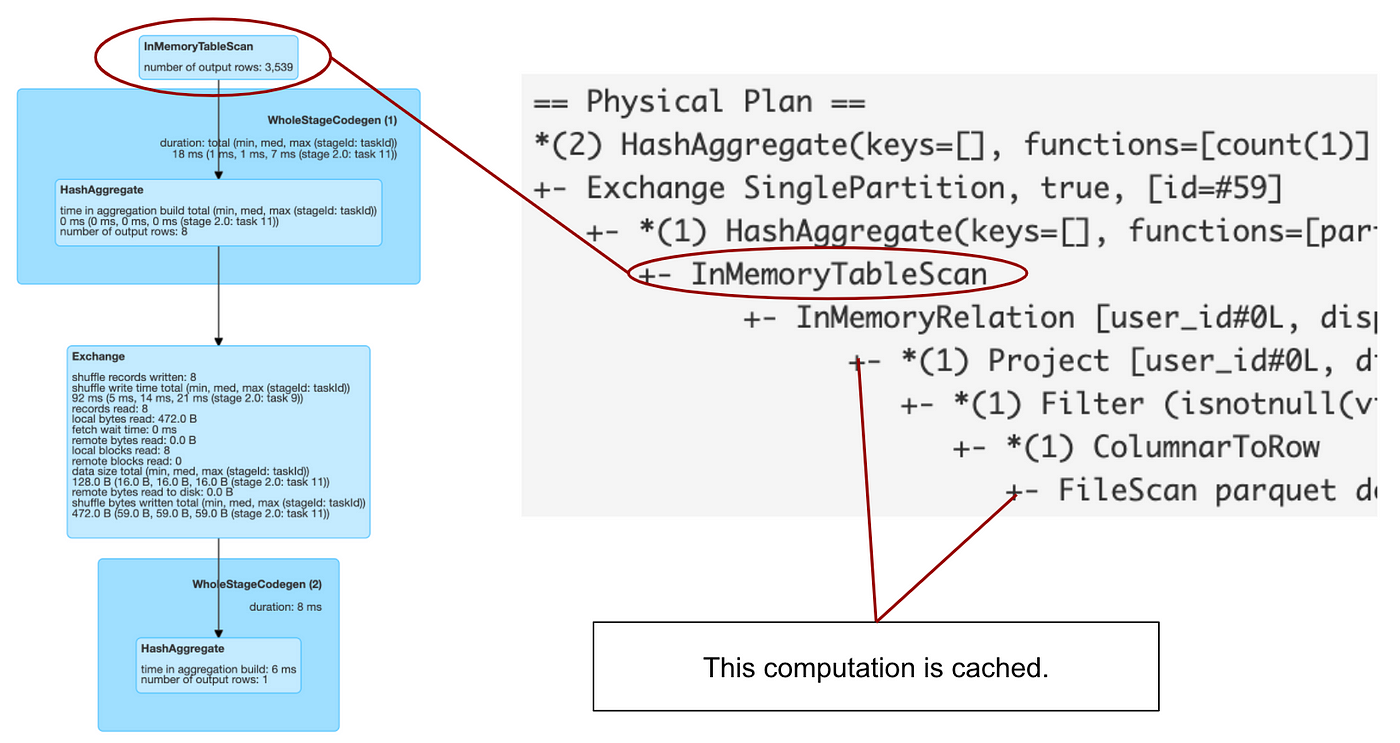

Imagem: https://towardsdatascience.com/best-practices-for-caching-in-spark-sql-b22fb0f02d34

https://sparkbyexamples.com/spark/spark-dataframe-cache-and-persist-explained/

***Como verificar o storage level de um dataframe?***

Leitura do resultado booleano: DISCO/ MEMÓRIA/ OFFHEAP/ SERIALIZADO/ REPLICAÇÃO

In [ ]:
dfu.storageLevel

StorageLevel(False, False, False, False, 1)

In [ ]:
dfu.cache()

DataFrame[Nome: string, MatFun: string, diretoria: string, departamento: string, cargo: string, salario: double]

In [ ]:
# Após chamar o cache:
dfu.storageLevel

StorageLevel(True, True, False, True, 1)

In [ ]:
# Tirando do cache.
dfu.unpersist()

DataFrame[Nome: string, MatFun: string, diretoria: string, departamento: string, cargo: string, salario: double]

**.persist()**

Semelhante ao cache, a diferença é que aqui podemos escolher onde o Spark vai armazenar as informações.

**StorageLevel.MEMORY_ONLY**: Armazena apenas na memória.

**StorageLevel.MEMORY_AND_DISK:** Armazena os dados em cache na memória e, se não houver memória suficiente disponível, os dados adicionais são armazenados em disco. Os dados em disco são mantidos em um formato compactado e podem ser lidos de volta para a memória quando necessário.

**StorageLevel.DISK_ONLY:** Armazena o DataFrame em cache apenas no disco

In [ ]:
import pyspark
data.persist(pyspark.StorageLevel.DISK_ONLY)

DataFrame[Nome: string, MatFun: string, diretoria: string, departamento: string, cargo: string, salario: double, media_salarios: double, soma_salarios: double, contagem_salarios: bigint]

In [ ]:
# Leitura do resultado booleano: DISCO/ MEMÓRIA/ OFFHEAP/ SERIALIZADO/ REPLICAÇÃO
data.storageLevel

StorageLevel(True, False, False, False, 1)

In [ ]:
import time

for i in range(500):
    print("Iteração", i+1)
    time.sleep(120)

Iteração 1
Iteração 2
Iteração 3
Iteração 4
Iteração 5
Iteração 6
Iteração 7
Iteração 8
Iteração 9
Iteração 10
Iteração 11
Iteração 12
Iteração 13
Iteração 14
Iteração 15
Iteração 16
Iteração 17
Iteração 18
Iteração 19
Iteração 20
Iteração 21
Iteração 22
Iteração 23
Iteração 24
Iteração 25
Iteração 26
Iteração 27
Iteração 28
Iteração 29
Iteração 30
Iteração 31
Iteração 32
Iteração 33
Iteração 34


KeyboardInterrupt: ignored

# 10 - Outros

## 10.1 **Carregando tabelas de um banco POSTGRE na nuvem**

Criando dataframe a partir de tabelas de um banco SQL do PostgreSQL hospedado na nuvem (AWS RDS).

In [ ]:
# Carregando tabela 'vendas':
pg_vendas = spark.read.format('jdbc')\
    .option('url', 'jdbc:postgresql://sparksql.cahhgseg4vc5.us-east-1.rds.amazonaws.com:5432/sparksql')\
    .option('dbtable', 'vendas')\
    .option('user', 'vinicius')\
    .option('password', '12345678')\
    .option('driver', 'org.postgresql.Driver')\
    .load()

# Carregando tabela 'clientes':
pg_clientes = spark.read.format('jdbc')\
    .option('url', 'jdbc:postgresql://sparksql.cahhgseg4vc5.us-east-1.rds.amazonaws.com:5432/sparksql') \
    .option('dbtable', 'clientes')\
    .option('user', 'vinicius')\
    .option('password', '12345678')\
    .option('driver', 'org.postgresql.Driver')\
    .load()

In [ ]:
# Visualizando dataframes:
pg_vendas.show(5)
pg_clientes.show(5)

+-------+----------+---------+----------+--------+
|idvenda|idvendedor|idcliente|      data|   total|
+-------+----------+---------+----------+--------+
|      1|         1|        1|2016-01-01| 8053.60|
|      2|         6|      185|2016-01-01|  150.40|
|      3|         7|       31|2016-01-02| 6087.00|
|      4|         5|        1|2016-01-02|13828.60|
|      5|         8|      120|2016-01-03|26096.66|
+-------+----------+---------+----------+--------+
only showing top 5 rows

+---------+--------------------+------+----+------+
|idcliente|             cliente|estado|sexo|status|
+---------+--------------------+------+----+------+
|        1|Adelina Buenaventura|    RJ|   M|Silver|
|        2|        Adelino Gago|    RJ|   M|Silver|
|        3|       Adélio Lisboa|    SE|   M|Silver|
|        4|       Adérito Bahía|    MA|   M|Silver|
|        5|     Adolfo Patrício|    PE|   M|Silver|
+---------+--------------------+------+----+------+
only showing top 5 rows



## 10.2 - **Gravando dataframe de volta no banco de dados**

Selecionamos da tabela vendas somente (data e total) e vamos salvar de volta no banco de dados com a tabela de nome data_venda.

In [ ]:
pg_venda_data = pg_vendas.select('data', 'total')

In [ ]:
# Gravar isso de volta como uma tabela no banco de dados:
# Trocando READ por WRITE e LOAD por SAVE, passando o nome da nova tabela para criar:
pg_venda_data.write.format('jdbc')\
      .option('url','jdbc:postgresql://sparksql.cahhgseg4vc5.us-east-1.rds.amazonaws.com:5432/sparksql')\
      .option('dbtable', 'data_venda')\
      .option('user', 'vinicius')\
      .option('password', '12345678')\
      .option('driver', 'org.postgresql.Driver')\
      .save()

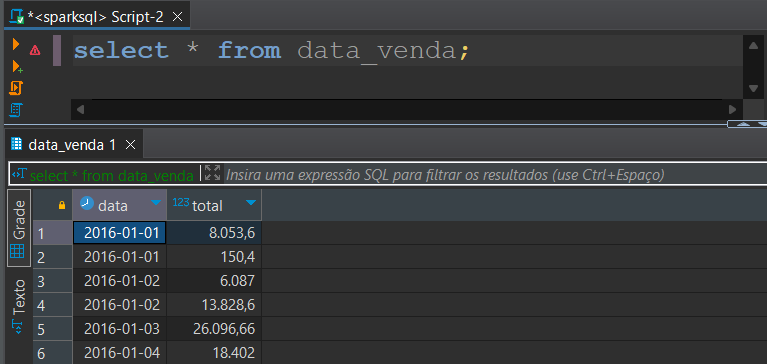

## 10.3 - Criando dataframe a partir de uma API


In [ ]:
import requests

# Utilizando o get para fazer a requisição na API.
response = requests.get('http://servicodados.ibge.gov.br/api/v1/localidades/estados/MG/municipios')

# Armazenando a requisição na variável data que vai converter para um objeto Python.
data = response.json()

# O retorno de data nesse caso vai ser uma lista de dicionários:
type(data)

list

In [ ]:
# Acessando o primerio item da lista que é um dicionários com dados de uma cidade:
data[0]

{'id': 3100104,
 'nome': 'Abadia dos Dourados',
 'microrregiao': {'id': 31019,
  'nome': 'Patrocínio',
  'mesorregiao': {'id': 3105,
   'nome': 'Triângulo Mineiro/Alto Paranaíba',
   'UF': {'id': 31,
    'sigla': 'MG',
    'nome': 'Minas Gerais',
    'regiao': {'id': 3, 'sigla': 'SE', 'nome': 'Sudeste'}}}},
 'regiao-imediata': {'id': 310061,
  'nome': 'Monte Carmelo',
  'regiao-intermediaria': {'id': 3111,
   'nome': 'Uberlândia',
   'UF': {'id': 31,
    'sigla': 'MG',
    'nome': 'Minas Gerais',
    'regiao': {'id': 3, 'sigla': 'SE', 'nome': 'Sudeste'}}}}}

In [ ]:
# Lista vazia para receber dicionários:
listaMG = []

# Loop for iterando em cada dicionário da lista 'data':
for cidade in data:
  dicionario = {
      'id': cidade['id'],
      'cidade': cidade['nome'],
      'estado': cidade['microrregiao']['mesorregiao']['UF']['sigla'],
      'microrregiao': cidade['microrregiao']['nome'],
      'mesorregiao': cidade['microrregiao']['mesorregiao']['nome'],
  }
# Apendando cada dicionário gerado na lista vazia:
  listaMG.append(dicionario)

In [ ]:
# Lista para as colunas sairem na ordem desejada:
ordem = ['id', 'cidade', 'mesorregiao', 'microrregiao']

# Criando DataFrame a partir da lista!
df_mg = spark.createDataFrame(listaMG).select(ordem)

In [ ]:
df_mg.show(truncate = False)

+-------+-------------------+--------------------------------+--------------------+
|id     |cidade             |mesorregiao                     |microrregiao        |
+-------+-------------------+--------------------------------+--------------------+
|3100104|Abadia dos Dourados|Triângulo Mineiro/Alto Paranaíba|Patrocínio          |
|3100203|Abaeté             |Central Mineira                 |Três Marias         |
|3100302|Abre Campo         |Zona da Mata                    |Manhuaçu            |
|3100401|Acaiaca            |Zona da Mata                    |Ponte Nova          |
|3100500|Açucena            |Vale do Rio Doce                |Ipatinga            |
|3100609|Água Boa           |Vale do Rio Doce                |Peçanha             |
|3100708|Água Comprida      |Triângulo Mineiro/Alto Paranaíba|Uberaba             |
|3100807|Aguanil            |Oeste de Minas                  |Campo Belo          |
|3100906|Águas Formosas     |Vale do Mucuri                  |Nanuque       

## 10.4 - Funções UDF

Antes de falar de funções UDF, deixo abaixo o exemplo da lib que vamos utilizar, ela serve para buscar informações de um determinado endereço e retorna informações sobre o mesmo, incluindo latitude e longitude.

Abaixo deixo link da documentação para mais detalhes:

https://nominatim.org/release-docs/develop/

In [ ]:
from geopy.geocoders import Nominatim

# Criando objeto geolocator que utiliza o serviço para geocodificação:
geolocator = Nominatim(user_agent = 'IBGE_MG')

# Criando 'localizador' com base na variável anterior:
local = geolocator.geocode('Belo Horizonte')

# Resultado das informções completas atráves do .raw:
local.raw

{'place_id': 364856099,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 246671856,
 'boundingbox': ['-20.0827318', '-19.7627318', '-44.1050948', '-43.7850948'],
 'lat': '-19.9227318',
 'lon': '-43.9450948',
 'display_name': 'Belo Horizonte, Região Geográfica Imediata de Belo Horizonte, Região Metropolitana de Belo Horizonte, Região Geográfica Intermediária de Belo Horizonte, Minas Gerais, Região Sudeste, 30180-107, Brasil',
 'class': 'place',
 'type': 'city',
 'importance': 0.8253345524770843,
 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_place_city.p.20.png'}

As UDFs (User-Defined Functions) são funções personalizadas definidas pelo usuário para executar operações personalizadas em colunas ou conjuntos de dados em um DataFrame do PySpark. Elas permitem estender a funcionalidade do PySpark além das funções embutidas e fornecem uma maneira de aplicar lógicas específicas do usuário durante o processamento de dados.

Em geral são usadas para aplicar transformações complexas ou lógica personalizada em um DataFrame. Elas são especialmente úteis quando você precisa fazer coisas que não são possíveis  usando apenas as funções embutidas do PySpark.

Com o DataFrame de cidades geradas, vamos usar a biblioteca geopy para buscar a latitude e longitude de cada uma das cidades, utilizando uma função, que depois é transformada em uma função UDF:

In [ ]:
# Função para buscar a latitude:
def buscar_lat(cidade, estado = 'MG'):
  geolocator = Nominatim(user_agent = 'IBGE_MG')
  endereco = f"{cidade}, {estado}"
  local = geolocator.geocode(endereco)
  return local.latitude

# Função para buscar a longitude:
def buscar_lon(cidade, estado = 'MG'):
  geolocator = Nominatim(user_agent = 'IBGE_MG')
  endereco = f"{cidade}, {estado}"
  local = geolocator.geocode(endereco)
  return local.longitude

# Convertendo funções Python para UDF:
buscar_lat_udf = F.udf(buscar_lat)
buscar_lon_udf = F.udf(buscar_lon)

# Aplicando as funções UDF em duas novas colunas:
df_mg = df_mg.withColumns({
    'latitude': buscar_lat_udf(F.col('cidade')),
    'longitude': buscar_lon_udf(F.col('cidade'))
})

In [ ]:
# Visualizando o DataFrame com as colunas novas:
df_mg.show(truncate = False)

+-------+-------------------+--------------------------------+--------------------+-----------+-----------+
|id     |cidade             |mesorregiao                     |microrregiao        |latitude   |longitude  |
+-------+-------------------+--------------------------------+--------------------+-----------+-----------+
|3100104|Abadia dos Dourados|Triângulo Mineiro/Alto Paranaíba|Patrocínio          |-18.4911191|-47.4063589|
|3100203|Abaeté             |Central Mineira                 |Três Marias         |-19.1566833|-45.4481213|
|3100302|Abre Campo         |Zona da Mata                    |Manhuaçu            |-20.295421 |-42.480131 |
|3100401|Acaiaca            |Zona da Mata                    |Ponte Nova          |-20.3621646|-43.1444162|
|3100500|Açucena            |Vale do Rio Doce                |Ipatinga            |-19.073056 |-42.546666 |
|3100609|Água Boa           |Vale do Rio Doce                |Peçanha             |-17.9956411|-42.3899261|
|3100708|Água Comprida      